# Spotify Dataset 1921-2020, 160k+ Tracks

https://www.kaggle.com/yamaerenay/spotify-dataset-19212020-160k-tracks

# Section 1: Business Understanding
In this notebook a CRISP-DM (CROSS INDUSTRY STANDARD PROCESS FOR DATA MINING) approach is used to answer the following business questions:

- ### <a href='#q1'>Question 1: In order to write a popular song, is the key and mode important?</a>
- ### <a href='#q2'>Question 2: 1955-1960: The popularity level climbs up - Who are the most famous artists at this time?</a>
- ### <a href='#q3'>Question 3: Which actual top artists write/have the most popular songs?</a>
- ### <a href='#q4'>Question 4: How do you become a famous song writer?</a>
- ### <a href='#q5'>Question 5: What are those songs with high popularity but zero tempo, danceability and speechiness?</a>

## Content
### Section 1: Business Understanding

###  <a href='#df'>Section 2: Data Understanding</a>
<a href='#df_load'>Load DataFrame</a>

<a href='#df_ds'>Descriptive Statistics</a>

<a href='#df_sum'>DataFrame Overview</a>

<a href='#df_vis_1'>Visualization: PDFs and Scatter plots of numerical variables for popularity study</a>

<a href='#df_nan'>Identifying 'quasi' NaN values</a>

<a href='#df_vis_2'>Visualization: Mean popularity data scatter plots</a>

<a href='#df_non'>Nonlinear tendencies for valence, acousticness, danceability, energy, instrumentalness, liveness</a>

<a href='#df_pop_0'>High amount of 0 values for popularity</a>

<a href='#df_corr'>Correlation plots</a>



###  <a href='#df_prep'>Section 3: Prepare Data</a>
<a href='#df_prep_function'>The get_prepared_df function</a>

<a href='#df_prep_drop'>Drop some unimportant columns</a>

<a href='#df_prep_nan'>Removing 'quasi' NaN values</a>

<a href='#df_prep_dummies'>Create dummy variables</a>

<a href='#df_prep_art_trans'>ArtistsTransformer class</a>

<a href='#df_prep_periods'>Create a time period subset</a>


### <a href='#model'>Section 4: Modeling</a>
<a href='#model_sklearn'>Linear Regression based on sklearn</a>

<a href='#model_tensorflow'>Deep Learning approach with TensorFlow</a>

<a href='#model_random_for'>Random Forest</a>

### <a href='#Evaluate_the_Results'>Section 5: Evaluate the Results</a>

## Important Libraries - Data Loading

In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style("darkgrid")
import matplotlib
#matplotlib.use('nbagg')
import matplotlib.pyplot as plt
%matplotlib inline

from IPython.display import Markdown, display, HTML
def printmd(string):
    display(Markdown(string))

# SKLEARN - ML
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler

# TENSORFLOW - ML
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping

# Own modules
import plot_df # simpliefies data plotting with a specially designed layout

def plot_bar(df, title, **kwargs):
    """
    INPUT:
        - df - dataframe to be plotted as bar plot, 
                index of df --> categorical x axis of the bar plot, 
                columns of df --> the bars of the plot
        - title - provide a title as string for the plot
        - **kwargs - (optional) paramters to overwrite the default setting of the bar_setting_dict 
    OUTPUT:
        - A bar plot with a specially designed layout
    
    AIM:
        1.) Overwrite the default setting of the bar_setting_dict dictionary
        2.) execute plot_df.plot_df_bar() - this function will then create the plot based on the provided settings
    """
    bar_setting_dict={
                    'x_label' : '',
                    'y_label' : '',
                    'figsize' :(6,4),
                    'layout' : (1, 1),
                    'width' : 0.3,
                    'align' : 'center',
                    'subplots' : False,
                    'fontsize_title' : 14,
                    'fontsize_axes_values' : 14,
                    'fontsize_axes_label' : 14,
                    'fontsize_text' : 14,
                    'fontsize_legend' : 14,
                    'set_yticks_range' : False,
                    'yticks_start' : None,
                    'yticks_end' : None,
                    'yticks_step' : None,
                    'legend_state' : False,
                    'legend_list_to_plot' : '',
                    'legend_move' : False,
                    'legend_x' : None,
                    'legend_y' : None}
    for key, value in kwargs.items():
        bar_setting_dict[key] = value
    plot_df.plot_df_bar(df, title, bar_setting_dict)

    
def plot_pie(df, title, explode, **kwargs):
    """
    INPUT:
        - df - dataframe to be plotted as a pie plot, columns of df --> the pie pieces of the plot
        - title - provide a title as string for the plot
        - explode - listto set the explosion of each pie piece, length must be equal to number of pie pieces
        - **kwargs - (optional) paramters to overwrite the default setting of the pie_setting_dict 
    OUTPUT:
        - A pie chart with a specially designed layout
    
    AIM:
        1.) Overwrite the default setting of the pie_setting_dict dictionary
        2.) execute plot_df.plot_df_bar() - this function will then create the plot based on the provided settings
    """
    pie_setting_dict = {'figsize' : (10,5),
                        'shadow' : True,
                        'autopct' : '%1.1f%%',
                        'startangle' :90,
                        'fontsize_title' : 14,
                        'fontsize_text' : 14,
                        'fontsize_legend' : 14,
                        'legend_state' : True,
                        'legend_title' : '',   
                        'legend_list_to_plot' : '',
                        'legend_move' : False,
                        'legend_x' : None,
                        'legend_y' : None}
    
    for key, value in kwargs.items():
        pie_setting_dict[key] = value
    plot_df.plot_df_pie(df, title, explode, pie_setting_dict)

In [2]:
# get back the used libraries and their versions as a list of tuples
import pkg_resources
import types
def get_imports():
    """
    INPUT: None
    
    OUTPUT: list of tuples with package names and tuples
    
    Aim: Get a list of packages and versions for README.md
    """
    for name, val in globals().items():
        if isinstance(val, types.ModuleType):
            # Split ensures you get root package, 
            # not just imported function
            name = val.__name__.split(".")[0]

        elif isinstance(val, type):
            name = val.__module__.split(".")[0]

        # Some packages are weird and have different
        # imported names vs. system/pip names. Unfortunately,
        # there is no systematic way to get pip names from
        # a package's imported name. You'll have to add
        # exceptions to this list manually!
        poorly_named_packages = {
            "PIL": "Pillow",
            "sklearn": "scikit-learn"
        }
        if name in poorly_named_packages.keys():
            name = poorly_named_packages[name]

        yield name
        
imports = list(set(get_imports()))

# Get the versions of the root package
# by cross-checking the names of installed packages vs. imported packages
requirements = []
for m in pkg_resources.working_set:
    if m.project_name in imports and m.project_name!="pip":
        requirements.append((m.project_name, m.version))

In [3]:
print(requirements)

[('tensorflow', '1.14.0'), ('seaborn', '0.9.0'), ('scikit-learn', '0.21.2'), ('pandas', '0.24.2'), ('numpy', '1.17.4'), ('matplotlib', '3.1.0')]


<a id='df'></a>

# Section 2: Data Understanding

A Short overview extracted directly from Kaggle:
### DataFrame SUMMARY: 
- Dataset with 170653 observations, 19 columns (13 numerical and 6 categorical/dummy) and no nan values
- **numerical** columns: 
    - acousticness: The relative metric of the track being acoustic, (Ranges from 0 to 1)
    - danceability: The relative measurement of the track being danceable, (Ranges from 0 to 1)
    - energy: The energy of the track,  (Ranges from 0 to 1)
    - duration_ms: The length of the track in milliseconds (ms), (Integer typically ranging from 200k to 300k)
    - instrumentalness:, The relative ratio of the track being instrumental, (Ranges from 0 to 1)
    - valence: The positiveness of the track, (Ranges from 0 to 1)
    - popularity: The popularity of the song lately, default country = US, (Ranges from 0 to 100)
    - tempo:The tempo of the track in Beat Per Minute (BPM), (Float typically ranging from 50 to 150)
    - liveness: The relative duration of the track sounding as a live performance, (Ranges from 0 to 1)
    - loudness: Relative loudness of the track in decibel (dB), (Float typically ranging from -60 to 0)
    - speechiness: The relative length of the track containing any kind of human voice, (Ranges from 0 to 1)
    - year: The release year of track, (Ranges from 1921 to 2020)
    - id, The primary identifier for the track, generated by Spotify
    
- **categorical** columns:
    - key: The primary key of the track encoded as integers in between 0 and 11 (starting on C as 0, C# as 1 and so on…)
    - artists: The list of artists credited for production of the track 
    - release_date: Date of release mostly in yyyy-mm-dd format, however precision of date may vary
    - name: The title of the track 
    - mode: The binary value representing whether the track starts with a major (1) chord progression or a minor (0)
    - explicit: The binary value whether the track contains explicit content or not, (0 = No explicit content, 1 = Explicit content)

<a id='df_load'></a>

## Load DataFrame

In [4]:
df = pd.read_csv('./Spotify_Music_Datasets_1921_2020_data.csv')

In [5]:
df

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982000,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.21100,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.6650,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732000,['Dennis Day'],0.819,180533,0.34100,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.1600,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961000,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.16600,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.1010,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967000,['Frank Parker'],0.275,210000,0.30900,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.3810,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957000,['Phil Regan'],0.418,166693,0.19300,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.2290,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665
5,0.1960,1921,0.579000,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.697,395076,0.34600,0,4pyw9DVHGStUre4J6hPngr,0.168000,2,0.1300,-12.506,1,Gati Mardika,6,1921,0.0700,119.824
6,0.4060,1921,0.996000,['John McCormack'],0.518,159507,0.20300,0,5uNZnElqOS3W4fRmRYPk4T,0.000000,0,0.1150,-10.589,1,The Wearing of the Green,4,1921,0.0615,66.221
7,0.0731,1921,0.993000,['Sergei Rachmaninoff'],0.389,218773,0.08800,0,02GDntOXexBFUvSgaXLPkd,0.527000,1,0.3630,-21.091,0,"Morceaux de fantaisie, Op. 3: No. 2, Prélude i...",2,1921,0.0456,92.867
8,0.7210,1921,0.996000,['Ignacio Corsini'],0.485,161520,0.13000,0,05xDjWH9ub67nJJk82yfGf,0.151000,5,0.1040,-21.508,0,La Mañanita - Remasterizado,0,1921-03-20,0.0483,64.678
9,0.7710,1921,0.982000,['Fortugé'],0.684,196560,0.25700,0,08zfJvRLp7pjAb94MA9JmF,0.000000,8,0.5040,-16.415,1,Il Etait Syndiqué,0,1921,0.3990,109.378


<a id='df_ds'></a>

## Descriptive Statistics

In [6]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
valence,170653,NaN,NaN,NaN,0.528587,0.263171,0,0.317,0.54,0.747,1
year,170653,NaN,NaN,NaN,1976.79,25.9179,1921,1956,1977,1999,2020
acousticness,170653,NaN,NaN,NaN,0.502115,0.376032,0,0.102,0.516,0.893,0.996
artists,170653,34088,['Эрнест Хемингуэй'],1211,NaN,NaN,NaN,NaN,NaN,NaN,NaN
danceability,170653,NaN,NaN,NaN,0.537396,0.176138,0,0.415,0.548,0.668,0.988
duration_ms,170653,NaN,NaN,NaN,230948,126118,5108,169827,207467,262400,5.4035e+06
energy,170653,NaN,NaN,NaN,0.482389,0.267646,0,0.255,0.471,0.703,1
explicit,170653,NaN,NaN,NaN,0.0845751,0.278249,0,0,0,0,1
id,170653,170653,0S7ILu8uGua2llPFY7psqu,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
instrumentalness,170653,NaN,NaN,NaN,0.16701,0.313475,0,0,0.000216,0.102,1


<a id='df_sum'></a>

## DataFrame Overview

In [7]:
def get_dataframe_summary(df, cat_list, dummy_list):
    """
    INPUT:
        - df-  the DataFrame which should be described in an overview
        - cat_list - a list of all categorical input features
        - dummy_list - a list of all dummy input features 
    
    OUTPUT:
        - print statements within the JUpyter notebook
        - output is auto generated
    
    AIM:
        - a reusable function for a dataframe summary in addition to the dataframe-describe() function
    """
    number_nan = df.isnull().sum()
    printmd('### DataFrame Summary')
    printmd('- Dataset with {} observations and {} columns'.format(df.shape[0], df.shape[1]))
    
    print('___________________________________')
    printmd('- **Numerical** columns:')
    row_num = []
    count_int = 0
    count_float = 0
    for col in df.columns.tolist():
        if (df[col].dtypes == 'float64' or df[col].dtypes == 'int64') and col not in cat_list and col not in dummy_list:
            row_num.append([col, df[col].dtypes, df[col].min(), df[col].max(), number_nan[col]])
            if df[col].dtypes == 'int64':
                count_int += 1
            if df[col].dtypes == 'float64':
                count_float += 1
    df_num = pd.DataFrame(row_num,columns=['column_name', 'type', 'min', 'max', 'number NaN'])
    display(df_num)

    print('___________________________________')
    printmd('- **Categorical** columns:')
    row_cat = []
    count_object = 0
    for col in df.columns.tolist():
        if df[col].dtypes == 'object' or col in cat_list:
            row_cat.append([col, df[col].dtypes, df[col].min(), df[col].max(), number_nan[col]])
            count_object += 1
    df_cat = pd.DataFrame(row_cat,columns=['column_name', 'type', 'min', 'max', 'number NaN'])
    display(df_cat)

    print('___________________________________')
    printmd('- **Dummy** columns:')
    row_dummy = []
    for col in dummy_list:
        if (df[col].dtypes == 'float64' or df[col].dtypes == 'int64'):
            row_dummy.append([col, df[col].dtypes, df[col].min(), df[col].max(), number_nan[col]])
    df_dummy = pd.DataFrame(row_dummy,columns=['column_name', 'type', 'min', 'max', 'number NaN'])
    display(df_dummy)
    
    print('___________________________________')
    printmd('- There are ***{} numerical*** ({}x int and {}x float) columns'.format(count_int + count_float, count_int, count_float))
    printmd('- There are ***{} categorical*** columns'.format(count_object))
    printmd('- There are ***{} dummy*** columns'.format(len(dummy_list)))
    
    print('___________________________________')
    printmd('- There are ***{} missing values*** in total in the dataset'.format(df.isnull().values.sum()))
  
get_dataframe_summary(df, cat_list=['key', 'mode', 'explicit'],dummy_list=[])

### DataFrame Summary

- Dataset with 170653 observations and 19 columns

___________________________________


- **Numerical** columns:

,column_name,type,min,max,number NaN
0,valence,float64,0.0,1.000,0
1,year,int64,1921.0,2020.000,0
2,acousticness,float64,0.0,0.996,0
3,danceability,float64,0.0,0.988,0
4,duration_ms,int64,5108.0,5403500.000,0
5,energy,float64,0.0,1.000,0
6,instrumentalness,float64,0.0,1.000,0
7,liveness,float64,0.0,1.000,0
8,loudness,float64,-60.0,3.855,0
9,popularity,int64,0.0,100.000,0


___________________________________


- **Categorical** columns:

,column_name,type,min,max,number NaN
0,artists,object,"[""'In The Heights' Original Broadway Company"",...",['조정현'],0
1,explicit,int64,0,1,0
2,id,object,000G1xMMuwxNHmwVsBdtj1,7zzuPsjj9L3M7ikqGmjN0D,0
3,key,int64,0,11,0
4,mode,int64,0,1,0
5,name,object,!Que Vida! - Mono Version,텅 빈 마음 Empty Heart,0
6,release_date,object,1921,2020-11-24,0


___________________________________


- **Dummy** columns:

,column_name,type,min,max,number NaN


___________________________________


- There are ***12 numerical*** (3x int and 9x float) columns

- There are ***7 categorical*** columns

- There are ***0 dummy*** columns

___________________________________


- There are ***0 missing values*** in total in the dataset

### Results: Normalization will be needed!
- As it can be seen from the min max ranges of all variables, a normalization (or standardization) approach may be beneficial in order to obtain fruitful predictions for popularity.

<a id='df_vis_1'></a>

## Visualization: PDFs and Scatter plots of numerical variables for popularity study
Let's start with the numerical variables of the dataset. A more focused analysis of categorical/dummy variables will be done later on. So let's study the ramaining columns of data_num a bit more intensively.

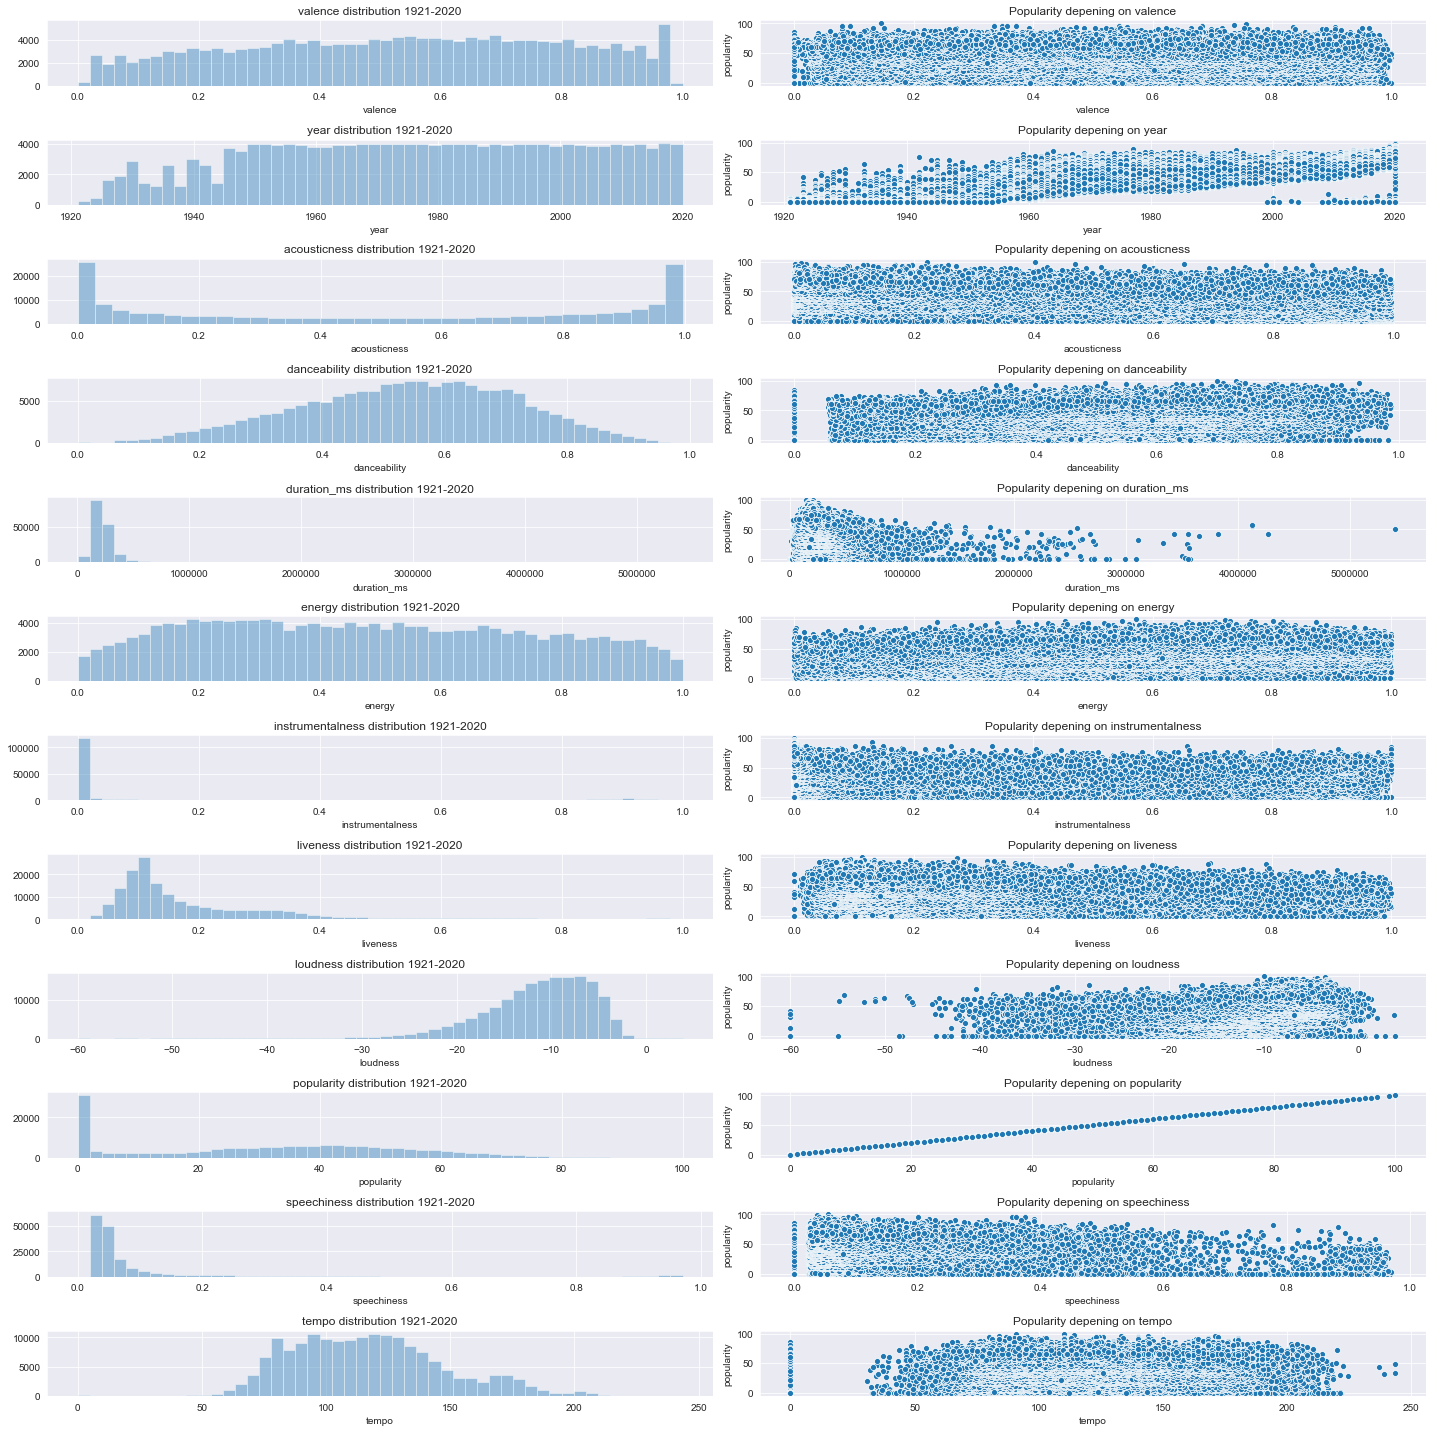

In [8]:
plt.figure(figsize=(20,20))
count=1
xy_columns = ['valence', 'year', 'acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness', 'popularity', 'speechiness', 'tempo']
x_columns = ['valence', 'year', 'acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo']

for xvar in xy_columns:
    plt.subplot(12,2, count);
    count += 1
    plt.gca().set_title(xvar + ' distribution 1921-2020');
    sns.distplot(a=df[xvar], kde=False);
    plt.subplot(12,2,count);
    count +=1
    plt.gca().set_title('Popularity depening on ' + xvar);
    sns.scatterplot(x=df[xvar], y=df.popularity);
    #sns.kdeplot(data=data_num[[xvar, 'popularity']], hue="kind", fill=True)
    #mean_df = df.groupby([xvar])['popularity'].mean().to_frame().reset_index()
    #sns.scatterplot(x=mean_df[xvar], y=mean_df.popularity, data=mean_df)

#plt.subplots_adjust(space = 0.5)
plt.tight_layout()

PDF distributions (left) and Scatter plots (right)
- The pdf plots (left side) help to understand the value distributions of all the numerical variables.
- The scatter plots (right side) show the dependence of popularity on the numerical variables


### Results: Outliers are dominant in some cases
- For example: Outliers are obvious for <a href='#tempo'>tempo</a> with some ***0bpm*** cases but a certain popularity. This has to be checked.
- Similar to 0 zero tempo there are songs with <a href='#0_dance'>0 danceability and 0 speechiness</a>.
- <a href='#nonlin'>valence, acousticness, danceability, energy, instrumentalness and liveness</a> show some nonlinear tendencies between their min and max values.
- <a href='#popularity'>popularity</a> shows a lot 0 values. It is not really clear if those values are true or due to missing data. Especially in the year is strange. It is the only year with almost the whole range of values. It could be that those values are related to ongoing data collection (not finished data setting for 2020)
- Not all variables are normally distributed. Hence, in a strict Linear Regression Approach via OLS some data arrangement would be needed to obtain stable predictions. Some data cleaning could help to optimize predictions.

Those phenomena will be studied in more detail in the next sections

<a id='df_nan'></a>

## Identifying 'quasi' NaN values
There are some columns with zero values which need special attention:

In [9]:
# Proportion of 0 for x_columns
for col in x_columns:
    print('Proportion of 0 values in ', col,': ', round((len(df)- np.count_nonzero(df[col], axis=0))/len(df)*100,2), '%')

Proportion of 0 values in  valence :  0.11 %
Proportion of 0 values in  year :  0.0 %
Proportion of 0 values in  acousticness :  0.01 %
Proportion of 0 values in  danceability :  0.08 %
Proportion of 0 values in  duration_ms :  0.0 %
Proportion of 0 values in  energy :  0.01 %
Proportion of 0 values in  instrumentalness :  27.3 %
Proportion of 0 values in  liveness :  0.01 %
Proportion of 0 values in  loudness :  0.0 %
Proportion of 0 values in  speechiness :  0.08 %
Proportion of 0 values in  tempo :  0.08 %


In [10]:
# Are the subsets identical?
for col in x_columns:
    printmd('Is subset of ***0 tempo*** equal to subset ***0 ' + col + '***? ' + str(df[df['tempo']==0].equals(df[df[col]==0])))

Is subset of ***0 tempo*** equal to subset ***0 valence***? False

Is subset of ***0 tempo*** equal to subset ***0 year***? False

Is subset of ***0 tempo*** equal to subset ***0 acousticness***? False

Is subset of ***0 tempo*** equal to subset ***0 danceability***? True

Is subset of ***0 tempo*** equal to subset ***0 duration_ms***? False

Is subset of ***0 tempo*** equal to subset ***0 energy***? False

Is subset of ***0 tempo*** equal to subset ***0 instrumentalness***? False

Is subset of ***0 tempo*** equal to subset ***0 liveness***? False

Is subset of ***0 tempo*** equal to subset ***0 loudness***? False

Is subset of ***0 tempo*** equal to subset ***0 speechiness***? True

Is subset of ***0 tempo*** equal to subset ***0 tempo***? True

<a id='0_dance'></a>

In [11]:
# Find some examples (most popular ones) of zero tempo songs
data_zero_tempo = df[df['tempo'] ==0].sort_values(by='popularity', ascending=False)
printmd('***# of songs with 0 bpm:*** ' + str(data_zero_tempo.shape[0]))
printmd('***Examples for 0 bpm songs:***')
display(data_zero_tempo[['name', 'artists', 'year', 'tempo', 'speechiness', 'danceability', 'popularity']].head(10))

***# of songs with 0 bpm:*** 143

***Examples for 0 bpm songs:***

,name,artists,year,tempo,speechiness,danceability,popularity
19030,Clean White Noise - Loopable with no fade,"['Erik Eriksson', 'White Noise Baby Sleep', 'W...",2017,0.0,0.0,0.0,85
19260,Soft Brown Noise,['High Altitude Samples'],2018,0.0,0.0,0.0,81
19038,White Noise - 500 hz,['Granular'],2017,0.0,0.0,0.0,79
19029,White Noise - 145 hz,['Granular'],2017,0.0,0.0,0.0,78
38356,White Noise Crashing Waves,['Bruce Brus'],2019,0.0,0.0,0.0,76
38133,Clean & Pure White Noise,['Zenibly'],2018,0.0,0.0,0.0,74
75221,Deep Sleep Recovery Noise,['Water Sound Natural White Noise'],2020,0.0,0.0,0.0,74
38348,Tepid Rainscape,['Fizzonaut'],2019,0.0,0.0,0.0,73
18641,Brown Noise - Loopable with No Fade,"['White Noise Meditation', 'Lullaby Land', 'Wh...",2015,0.0,0.0,0.0,72
56682,Pure Brown Noise - Loopable with no fade,"['Erik Eriksson', 'White Noise for Babies', 'W...",2017,0.0,0.0,0.0,72


### Results:  0bpm songs are noises and sounds
In fact, as one can see from the above eavluation those 'songs' with zero bpm (zero danceability, zero speechiness) are not real songs but noises or sounds. It seems that those 'sounds' are popular because they seem to have a positive affect on deep sleep or for relaxation.  As the goal is to give an answer to a song writer 'How to write popular ***real*** songs', those data should be removed from the dataset.    

<a id='df_vis_2'></a>

## Visualization: Mean popularity data scatter plots
PDF plots of the numerical variables are provided on the left side as before, however, in order to understand the scatter plots better, the ***mean popularity*** for each numerical variable is plotted on the right side now.

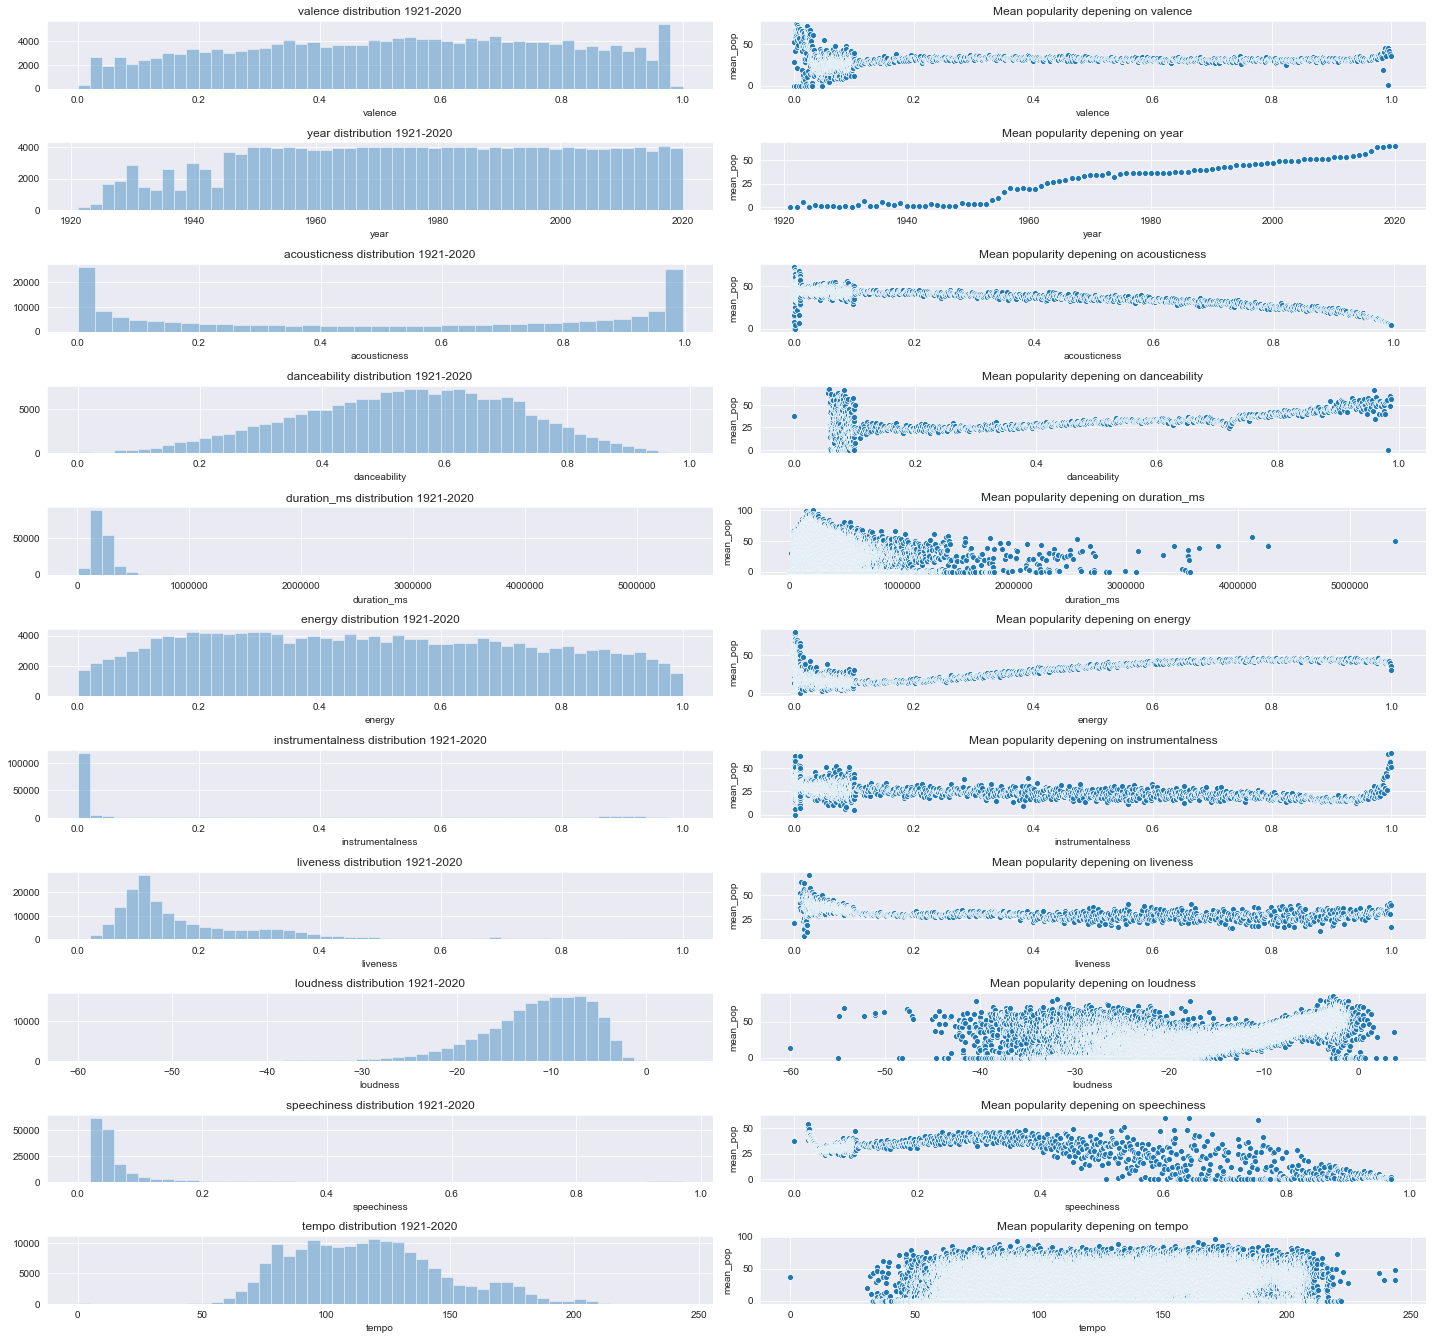

In [12]:
plt.figure(figsize=(20,20))
count=1

for xvar in x_columns:
    plt.subplot(12,2, count);
    count += 1
    plt.gca().set_title(xvar + ' distribution 1921-2020');
    sns.distplot(a=df[xvar], kde=False);
    plt.subplot(12,2,count);
    count +=1
    plt.gca().set_title('Mean popularity depening on ' + xvar);
    #sns.scatterplot(x=df[xvar], y=df.popularity);
    #sns.kdeplot(data=data_num[[xvar, 'popularity']], hue="kind", fill=True)
    mean_df = df.groupby([xvar])['popularity'].mean().to_frame().reset_index()
    mean_df['mean_pop'] = mean_df['popularity']
    sns.scatterplot(x=mean_df[xvar], y=mean_df.mean_pop)

#plt.subplots_adjust(space = 0.5)
plt.tight_layout()

### Results: There some linear  and non-linear trends for popularity
There are some 'first glance relationshiphs' of the dependent variable 'popularity' on the independent variable set:

- For low values of valence, popularity, acousticness, danceability, energy, instrumentalness, liveness some data accumulation is obvious, e.g. for valence there accumulated data between valence=0.0 and valence=0.1 For those variables there seem to be non linearities in the dataset.

The following table indicates popularity trends in the scatter plot via arrows. 
- An arrow &leftarrow; indicates a higher popularity to the lower range of the corresponding independent variable. 
- An arrow &rightarrow; indicates a higher popularity to the upper range of the corresponding independent variable. 
- RohP = Region of high popularity

Variable |  min &leftarrow; RohP &rightarrow; max
---------| -------
valence | &leftarrow;
year | &rightarrow;
acousticness | &leftarrow;
danceability | &leftarrow; &rightarrow;
duration_ms | &leftarrow;
energy | &leftarrow; &rightarrow;
instrumentalness | &leftarrow; &rightarrow;
liveness | &leftarrow;
loudness | &leftarrow;
speechiness | &leftarrow;
tempo | &leftarrow; &rightarrow;

- For some input features there is clear linear dependence on song popularity, for example for year  
- However there also features for which their dependence on popularity are not completely clear so far. For example, tempo seems to be independent from song popularity within a certain range, approximately between 75 bpm and 200 bpm

<a id='df_non'></a>

## Nonlinear tendencies for valence, acousticness, danceability, energy, instrumentalness, liveness

***valence***, ***acousticness***, ***danceability***, ***energy***, ***instrumentalness*** and '***liveness***' exhibit a certain data spreading for low values. In order to understand trends better, on each of those variables it will be focused on. Thereby scatter and density plots in combination with the mean popularity are shown below.

<Figure size 216x216 with 0 Axes>

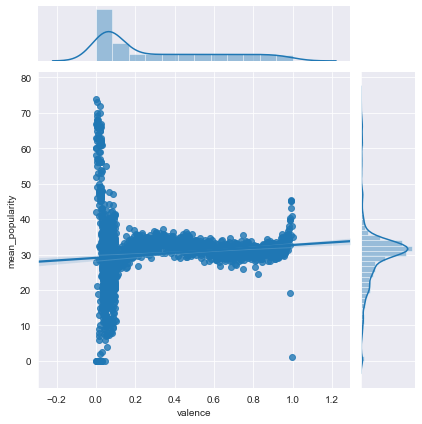

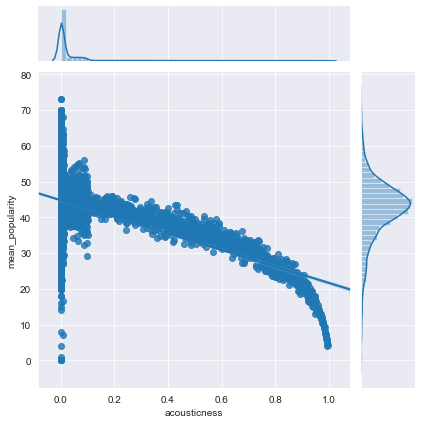

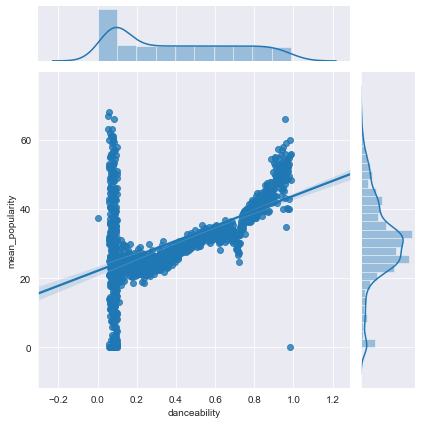

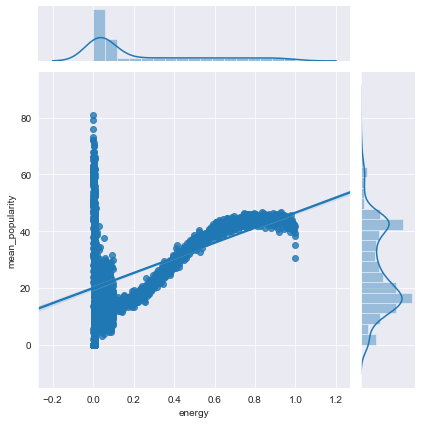

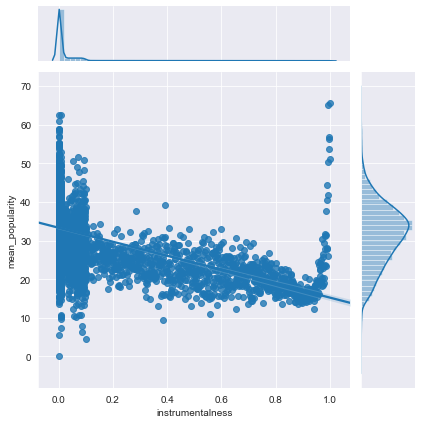

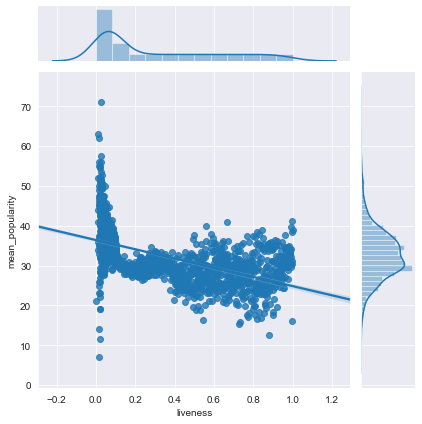

In [13]:
# Create scatter and density plots for the spread_set
spread_set= ['valence', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness']

plt.figure(figsize=(3,3))
for i, xvar in enumerate(spread_set):
    mean_df = df.groupby([xvar])['popularity'].mean().to_frame().reset_index()
    mean_df['mean_popularity'] = mean_df['popularity']
    #sns.scatterplot(x=mean_df[xvar], y=mean_df.popularity)
    sns.jointplot(x=xvar, y='mean_popularity', data=mean_df, kind='reg')

### Result:
For all 6 variables above there is something like a '3 regions' data distribution. A split of the ***popularity vs variable regions*** seems to be interesting. Therefore the following splitting approach will be applied.

<Figure size 216x216 with 0 Axes>

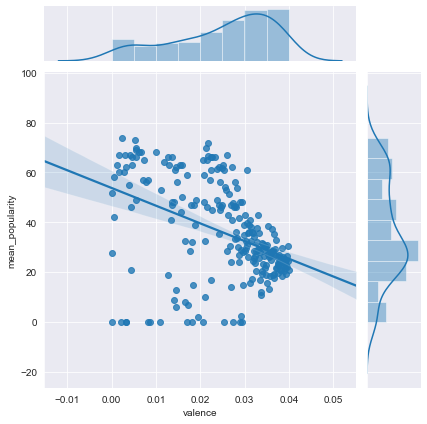

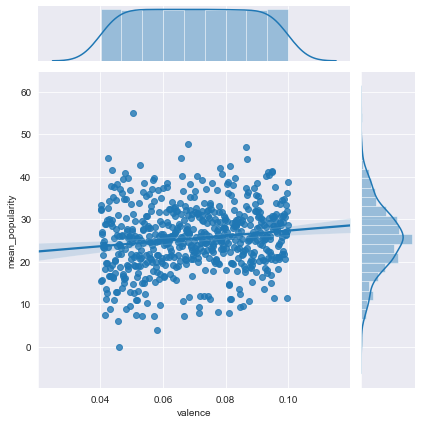

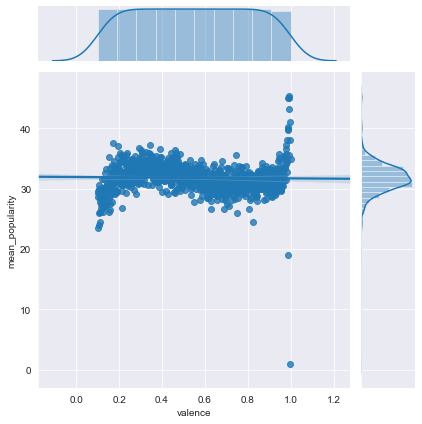

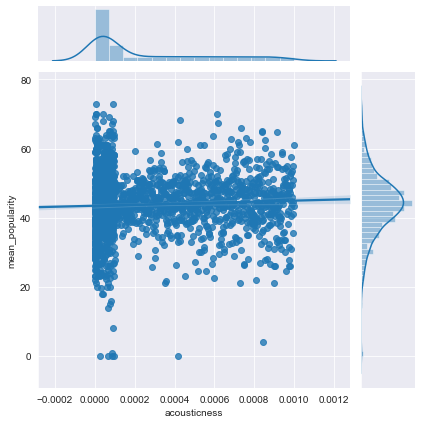

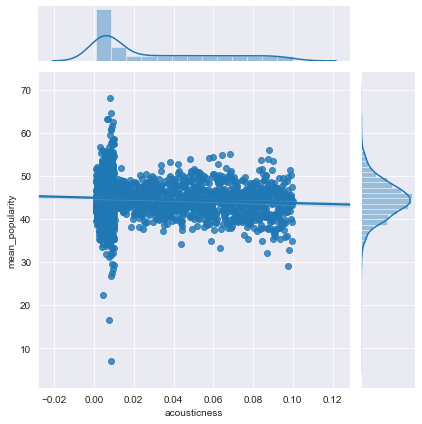

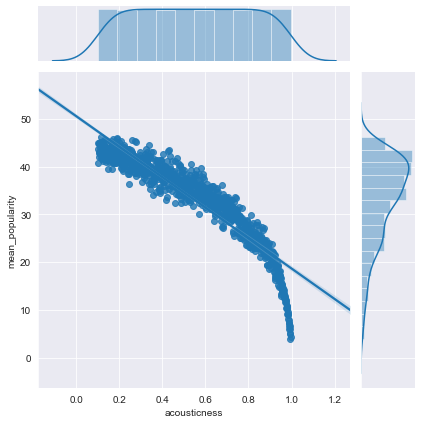

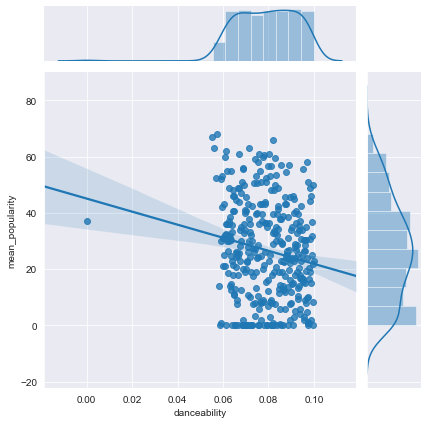

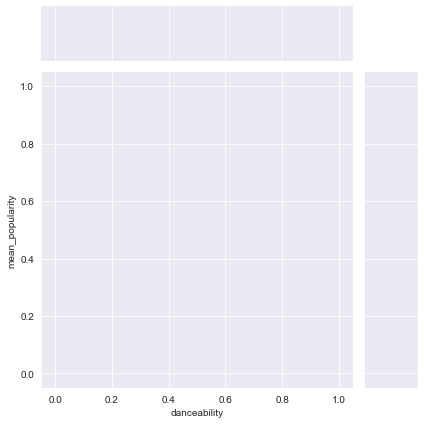

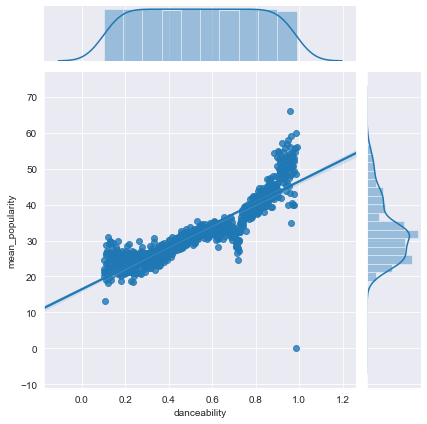

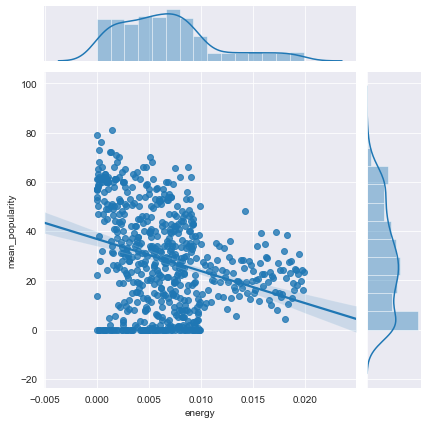

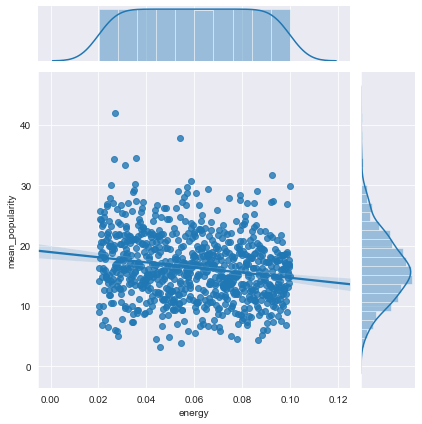

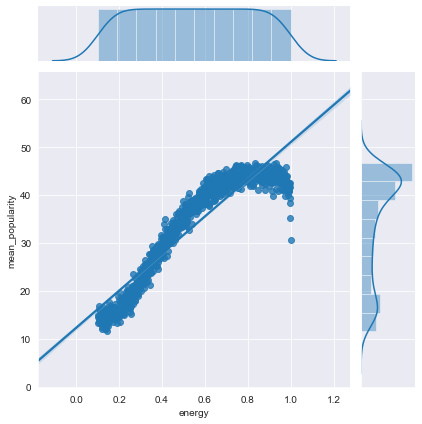

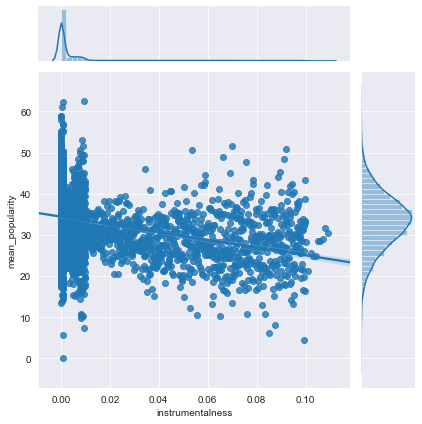

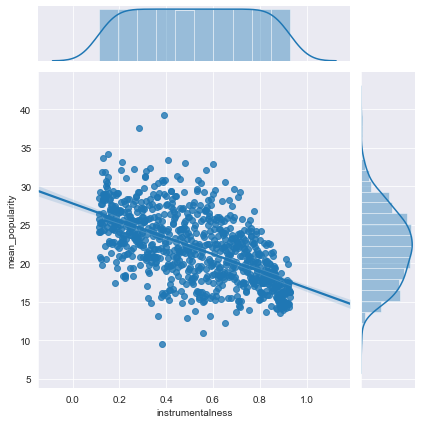

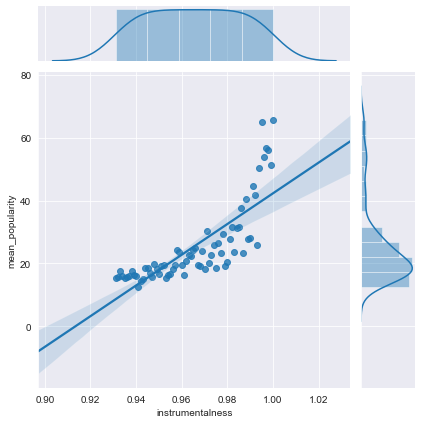

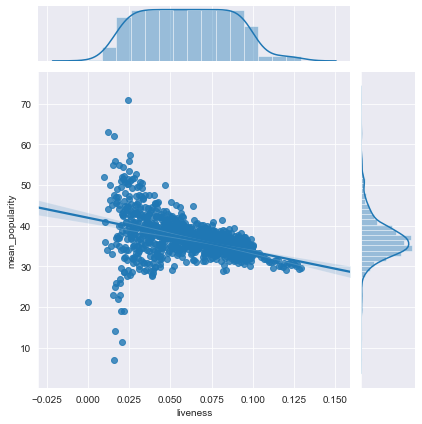

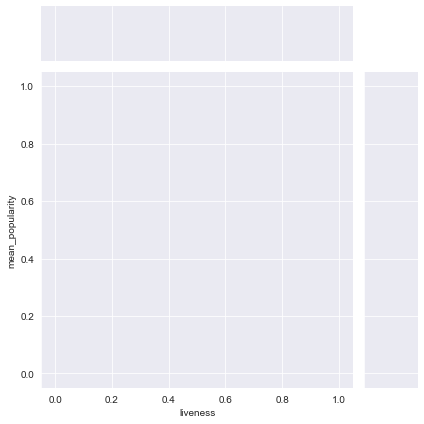

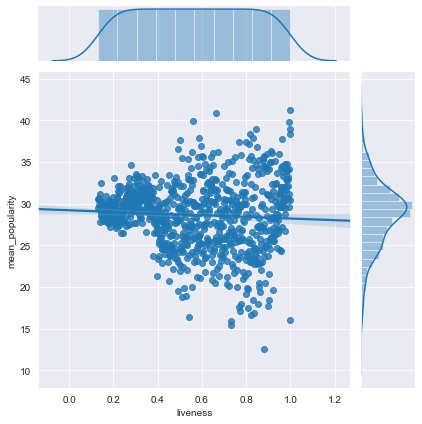

In [14]:
# Split each variable of the spread_set into its linear regions
# use region_split to perform the split
# each element in region_split is a tuple with two floats, which are the split locations 
# plot mean popularity for each spread_set element and for all linear regions
# collect the data amount for each low, middle and high region
data_amount_low = []
data_amount_middle = []
data_amount_high = []
plt.figure(figsize=(3,3))
region_split = [(0.04,0.1), (0.001,0.1), (0.1,0.1), (0.02,0.1), (0.11,0.93), (0.13,0.13)]
for xvar, split in zip(spread_set, region_split):
    mean_df = df.groupby([xvar])['popularity'].mean().to_frame().reset_index()
    mean_df['mean_popularity'] = mean_df['popularity']
    
    mean_df_low = mean_df[mean_df[xvar] < split[0]]
    data_amount_low.append(mean_df_low.shape[0])
    
    mean_df_middle = mean_df[(mean_df[xvar] > split[0]) & (mean_df[xvar] < split[1])]
    data_amount_middle.append(mean_df_middle.shape[0])
    
    mean_df_high = mean_df[mean_df[xvar] > split[1]]
    data_amount_high.append(mean_df_high.shape[0])
    
    sns.jointplot(x=xvar, y='mean_popularity', data=mean_df_low, kind='reg')
    try:
        sns.jointplot(x=xvar, y='mean_popularity', data=mean_df_middle, kind='reg')
    except:
        pass
    
    sns.jointplot(x=xvar, y='mean_popularity', data=mean_df_high, kind='reg')

In [15]:
# Create an overview plot for each spread_set variable in each linear region. Plot the data amount of the regions.
df_datadense_split = pd.DataFrame({'col_name': spread_set, 'split_1': [split[0] for split in region_split], 'split_2': [split[1] for split in region_split],'low_range' : data_amount_low, 'middle_range': data_amount_middle, 'high_range' : data_amount_high})
df_datadense_split

,col_name,split_1,split_2,low_range,middle_range,high_range
0,valence,0.040,0.10,236,598,897
1,acousticness,0.001,0.10,1994,1797,896
2,danceability,0.100,0.10,355,0,884
3,energy,0.020,0.10,631,799,900
4,instrumentalness,0.110,0.93,4510,819,70
5,liveness,0.130,0.13,869,0,870


### Result:
The table above shows the value counts for each variable in its corresponding (approximately) linear regions. A ***nonlinear*** deep learning regression model could optimize predictions on popularity. However, as a first approach in this notebook the focus will rely on LinearRegression models from sklearn.

<a id='df_pop_0'></a>

## High amount of 0 values for popularity:
There is an enourmous amount of 0 values for popularity between 1921 and 1950 and especially for 2020. For 2020 this observation could be related to no non completed datasets or real missing data. But this is just speculation. The amount of 0 values for popularity results in 16% of the whole dataset.

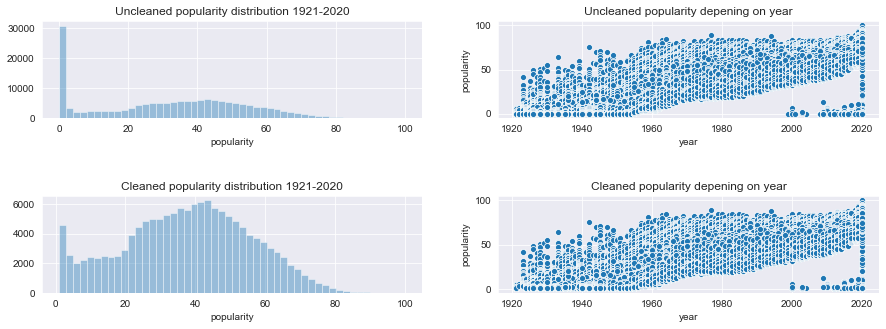

In [16]:
# Let's remove 0 values rows for popularity
df_pop_cleaned = df[df['popularity'] !=0]

# Popularity uncleaned
plt.figure(figsize=(15,5))
plt.subplot(2,2,1)
plt.gca().set_title('Uncleaned popularity distribution 1921-2020')
sns.distplot(a=df.popularity, kde=False)
plt.subplot(2,2,2)
plt.gca().set_title('Uncleaned popularity depening on year')
sns.scatterplot(x=df.year, y=df.popularity)

# Popularity cleaned
plt.subplot(2,2,3)
plt.gca().set_title('Cleaned popularity distribution 1921-2020')
sns.distplot(a=df_pop_cleaned.popularity, kde=False)
plt.subplot(2,2,4)
plt.gca().set_title('Cleaned popularity depening on year')
sns.scatterplot(x=df_pop_cleaned.year, y=df_pop_cleaned.popularity)
plt.subplots_adjust(hspace = 0.8)

### Results:
- The popularity PDF after cleaning is much more normally ditributed than before. A better model prediction is expected from such a cleaning step.
- However: It is believed that for the data majority 0 popularity values are true. Therefore for calculations and  predictions below the **full** popularity set will be used.

<a id='df_corr'></a>

## Correlation plots

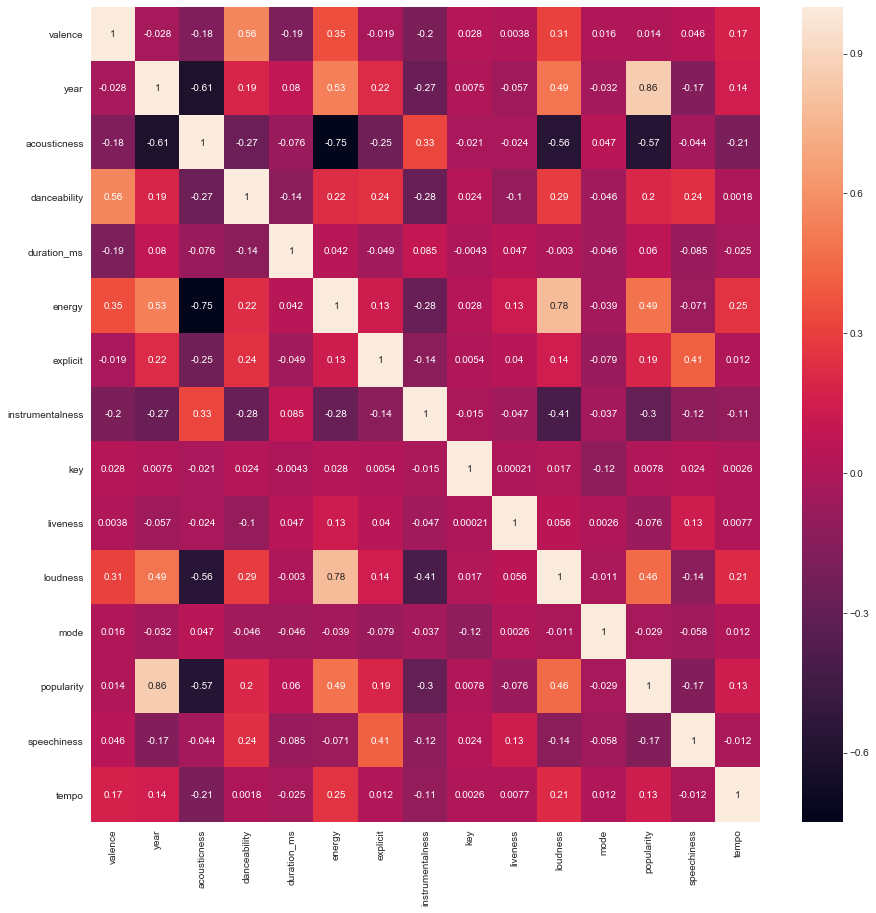

In [17]:
# Looking at correlations
plt.figure(figsize = (15,15)) #creating the 'canvas'
sns.heatmap(df.corr(), annot=True)

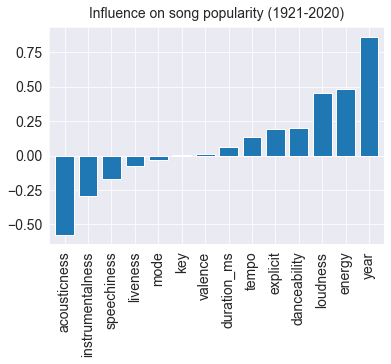

In [18]:
# Sort correaltion matrix
correlation_mat = df.corr()
corr_pairs = correlation_mat.unstack().sort_values()
corr_pop = corr_pairs['popularity'].drop('popularity', axis=0)
#display(corr_pop)
plot_bar(corr_pop, title ='Influence on song popularity (1921-2020)', width=0.8)

### Results:
#### Clear negative influence on song popularity for 
- acousticness: correlated also negatively with loudness, energy and danceability and year
- instrumentalness: similar (but less signal) to acousticness correlates also negatively with loudness, energy and danceability and year)

#### Clear positive influence on song popularity. e.g. for
- year 
- energy
- loudness
- danceability

The correlation with duration_ms, valence, key, mode and liveness is weak.
Some kind (but minor) correlation can be observed for explicit, tempo - positiv - and for speechness - negativ.

Why is Year so important?
There is no kind of ‚Amount of Advertisement‘ column or ‚Social-Media-Likes‘-Column in the dataset. So there is room for speculation. But it is obvious, that it could be related to the development of growing music fan bases by growing (social) media platforms with the years. 





<a id='df_prep'></a>

# Section 3: Prepare Data

<a id='df_prep_function'></a>

### The get_prepared_df function

In [19]:
def get_prepared_df(df, cols_to_drop, target):
    """
    INPUT:
        - df - the unprepared DataFrame
        - cols_to_drop - columns to drop, as they are not needed for modelling
        - target-  target column for modelling
    
    OUTPUT:
        - data_cleaned - the cleaned and prepared DataFrame
        - xy_columns - a list with dependent and independent column names used for modelling
        - x_columns - a list with only dependent column names used for modelling
    
    AIM:
        - get a prepared DataFrame for modelling and list(s) of its column names 
        - remove columns not needed
        - remove zero tempo (zero danceability and zero speechiness) rows
    """
    col_drop_with_target = cols_to_drop.copy()
    col_drop_with_target.append(target)
    
    # list with dependent and independent variables
    xy_columns = df.drop(cols_to_drop, axis=1).columns.tolist()
    printmd('#### Dependent and independent variable set')
    print(xy_columns)

    # list with only independent variables
    x_columns = df.drop(col_drop_with_target, axis=1).columns.tolist()
    printmd('#### Only independent variables')
    print(x_columns)
    
    # data_cleaned = df with cols_to_drop removed
    data_cleaned = df.drop(cols_to_drop, axis=1)

    # Let's remove zero tempo (zero danceability and zero speechiness) rows
    data_cleaned = data_cleaned[data_cleaned['tempo'] !=0]
    printmd('#### New shape of prepared DataFrame')
    print(data_cleaned.shape)

    column_set = data_cleaned.columns.tolist()
    
    return data_cleaned, xy_columns, x_columns

<a id='df_prep_drop'></a>

## Drop some unimportant columns
As the focus relies on song popularity one should remove variables that are not useful for its prediction
- ***id:*** It splits into 170653 unique entires. This is the number of rows in the dataset. This column should be removed from the data investigation.
- ***name:*** This text value has too less power for a popularity prediction. There are 133638 unique entries (78% of the dataframe). There are some dublicates, but too less, to justify its transformation to dummy variables.
- ***release-date:*** as it can be already seen from the min and max values in the descriptive statistics table there is some mixture in the datetime formats. It can be ignored as the focus relies on a yearly based analysis. This information is already provided in the 'year' column.

In [20]:
# Get cleaned DataFrame with only numerical columns including the target column
data_cleaned, xy_columns, x_columns = get_prepared_df(df, ['id', 
                                                       'name', 
                                                       'release_date', 
                                                      ],
                                                       'popularity')

#### Dependent and independent variable set

['valence', 'year', 'acousticness', 'artists', 'danceability', 'duration_ms', 'energy', 'explicit', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'popularity', 'speechiness', 'tempo']


#### Only independent variables

['valence', 'year', 'acousticness', 'artists', 'danceability', 'duration_ms', 'energy', 'explicit', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'speechiness', 'tempo']


#### New shape of prepared DataFrame

(170510, 16)


<a id='df_prep_nan'></a>

## Removing 'quasi' NaN values
As discussed in Section 2 (Data Understanding) it makes sense to remove songs with zero tempo. Those songs are just noises and sounds. These data rows do not help for predicting popularities of **real** songs.

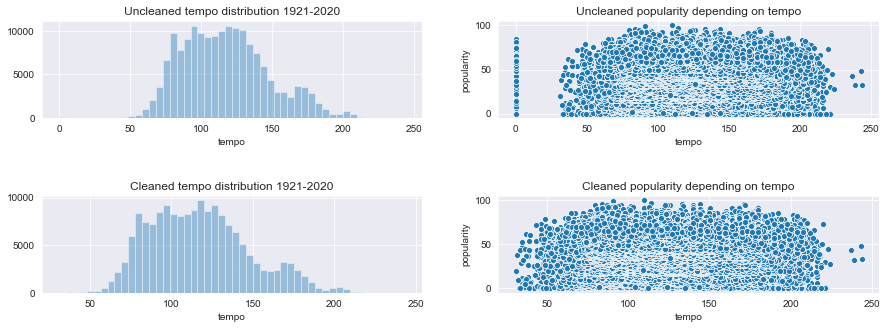

In [21]:
# Let's remove zero tempo (zero danceability and zero speechiness) rows
df_tempo_cleaned = df[df['tempo'] !=0]

plt.figure(figsize=(15,5))
plt.subplot(2,2,1)
plt.gca().set_title('Uncleaned tempo distribution 1921-2020')
sns.distplot(a=df.tempo, kde=False)
plt.subplot(2,2,2)
plt.gca().set_title('Uncleaned popularity depending on tempo')
sns.scatterplot(x=df.tempo, y=df.popularity)

plt.subplot(2,2,3)
plt.gca().set_title('Cleaned tempo distribution 1921-2020')
sns.distplot(a=df_tempo_cleaned.tempo, kde=False)
plt.subplot(2,2,4)
plt.gca().set_title('Cleaned popularity depending on tempo')
sns.scatterplot(x=df_tempo_cleaned.tempo, y=df_tempo_cleaned.popularity)
plt.subplots_adjust(hspace = 0.8)

<a id='df_prep_cat'></a>

<a id='df_prep_dummies'></a>

## Create dummy variables
Now let's take a look on the categorical columns
- ***artists:*** For sure, this is an important column for popularity. By inuition it is clear, that for an already famous artist it will be more easy to produce a new popular song than for an unknown artist. 
- ***mode:*** This is a categorical variable with 0 and 1. 
- ***key:*** A categorical variable with values ranging between 0 and 11, each value for one note. 
- ***explicit*** is a categorical variable with 0 and 1. 

For these categorical variables dummy variables are needed to build a predicting model.

**create_dummy_df** (see below) will be called by the model building function **clean_fit_linear_mod** (see Section 4: Modeling). 
Categorical variables will be created for the variables listed in **cat_cols**.

In [22]:
# Create DUMMY VARIABLES
def create_dummy_df(df, cat_cols, dummy_na):
    '''
    INPUT:
        - df - pandas dataframe with categorical variables you want to dummy
        - cat_cols - list of strings that are associated with names of the categorical columns
        - dummy_na - Bool holding whether you want to dummy NA vals of categorical columns or not
    
    OUTPUT:
        - df - a new dataframe that has the following characteristics:
            1. contains all columns that were not specified as categorical
            2. removes all the original columns in cat_cols
            3. dummy columns for each of the categorical columns in cat_cols
            4. if dummy_na is True - it also contains dummy columns for the NaN values
            5. Use a prefix of the column name with an underscore (_) for separating 
    AIM:
        - create a dataframe with categorical features replaced by dummies
    '''
    
    for col in  cat_cols:
        try:
            # for each cat add dummy var, drop original column
            df = pd.concat([df.drop(col, axis=1), pd.get_dummies(df[col], prefix=col, prefix_sep='_', drop_first=True, dummy_na=dummy_na)], axis=1)
        except:
            continue
    return df

<a id='df_prep_art_trans'></a>

## ArtistsTransformer class
The categorical ArtistsTransformer class in this work was taken from and developed by [Guy Kahana & Anat Peled](https://www.kaggle.com/anatpeled/spotify-popularity-prediction/comments)

In [23]:
class ArtistsTransformer():
  """ This transformer recives a DF with a feature 'artists' of dtype object
      and convert the feature to a float value as follows:
      1. Replace the data with the artists mean popularity
      2. Replace values where artists appear less than MinCnt with y.mean()
      3. Replace values where artists appear more than MaxCnt with 0
      
      PARAMETERS:
      ----------
      MinCnt (int): Minimal treshold of artisits apear in dataset, default = 3
      MaxCnt (int): Maximal treshold of artisits apear in dataset, default = 600

      RERTURN:
      ----------
      A DataFrame with converted artists str feature to ordinal floats
  """

  def __init__(self, MinCnt = 3.0, MaxCnt = 600.0):
      self.MinCnt = MinCnt
      self.MaxCnt = MaxCnt
      self.artists_df = None
  
  def fit (self, X, y):
      self.artists_df =  y.groupby(X.artists).agg(['mean', 'count'])
      self.artists_df.loc['unknown'] = [y.mean(), 1]
      self.artists_df.loc[self.artists_df['count'] <= self.MinCnt, 'mean'] = y.mean()
      self.artists_df.loc[self.artists_df['count'] >= self.MaxCnt, 'mean'] = 0
      return self

  def transform(self, X, y=None):
      X['artists'] = np.where(X['artists'].isin(self.artists_df.index), X['artists'], 'unknown')
      X['artists'] = X['artists'].map(self.artists_df['mean'])
      return X



<a id='df_prep_periods'></a>

## Create a time period subset
For modeling in certain periods a year_range function was created

In [24]:
# Function to create subsets

def year_range(df, period):
    period_track_count = {}
    """
    INPUT:
        - df - pandas dataframe as the base for the subset
        - period - list with two elements: start year (int) and end year (int) 
    
    OUTPUT:
        - df_ranged - the new time ranged dataframe
        - period_track_count - how many tracks are there in the period
    AIM:
        - get a time ranged dataframe
    """
    df_ranged = df[(df['year'] >= period[0]) & (df['year'] <= period[1])]
    period_track_count[str(period[0]) + '-' + str(period[1])] = df_ranged.shape[0]
    
    return df_ranged, period_track_count

<a id='model'></a>

# Section 4: Modeling

<a id='model_sklearn'></a>

## Linear Regression based on sklearn

In [25]:
def clean_fit_linear_mod(df, response_col, cat_cols, dummy_na, test_size=.3, rand_state=42):
    '''
    INPUT:
        - df - a dataframe holding all the variables of interest
        - response_col - a string holding the name of the column 
        - cat_cols - list of strings that are associated with names of the categorical columns
        - dummy_na - Bool holding whether you want to dummy NA vals of categorical columns or not
        - test_size - a float between [0,1] about what proportion of data should be in the test dataset
        - rand_state - an int that is provided as the random state for splitting the data into training and test 
    
    OUTPUT:
        - test_score - float - r2 score on the test data
        - train_score - float - r2 score on the test data
        - lm_model - model object from sklearn
        - X_train, X_test, y_train, y_test - output from sklearn train test split used for optimal model
    
    AIM:
        1. Drop the rows with missing response values
        2. Drop columns with NaN for all the values
        3. Use create_dummy_df to dummy categorical columns
        4. Fill the mean of the column for any missing values 
        5. Split your data into an X matrix and a response vector y
        6. Create training and test sets of data
        7. Instantiate a LinearRegression model with normalized data
        8. Fit your model to the training data
        9. Predict the response for the training data and the test data
        10. Obtain an rsquared value for both the training and test data
    '''
    #Drop the rows with missing response values
    df  = df.dropna(subset=[response_col], axis=0)

    #Drop columns with all NaN values
    df = df.dropna(how='all', axis=1)

    #Dummy categorical variables
    df = create_dummy_df(df, cat_cols, dummy_na)

    # Mean function
    #fill_mean = lambda col: col.fillna(col.mean())
    # Fill the mean
    #df = df.apply(fill_mean, axis=0)

    #Split into explanatory and response variables
    X = df.drop(response_col, axis=1)
    y = df[response_col]

    #Split into train and test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=rand_state)
    
    # Apply AritistsTransformer on train and test seperatly
    artists_transformer = ArtistsTransformer(MinCnt=2)
    X_train = artists_transformer.fit(X_train, y_train).transform(X_train, y_train)
    X_test = artists_transformer.transform(X_test, y_test)
    
    scaler = MinMaxScaler()
    cols = X.columns.tolist()
    X_train[cols] = scaler.fit_transform(X_train[cols])
    X_test[cols] = scaler.fit_transform(X_test[cols])

    lm_model = LinearRegression(normalize=False) # Instantiate
    lm_model.fit(X_train, y_train) #Fit

    #Predict using your model
    y_test_preds = lm_model.predict(X_test)
    y_train_preds = lm_model.predict(X_train)

    #Score using your model
    test_score = r2_score(y_test, y_test_preds)
    train_score = r2_score(y_train, y_train_preds)

    return test_score, train_score, lm_model, X_train, X_test, y_train, y_test, y_test_preds
    

# prepare the dataframe for model creation. Start from the prepared numerical dataframe
df_for_ml, _ = year_range(df, [1921,2020]) 
df_for_ml, xy_columns, x_columns = get_prepared_df(df_for_ml, ['id', 'name', 'release_date', 'year'], 'popularity')

print(df_for_ml.shape)

response_col = 'popularity'
cat_cols_lst = ['key', 'mode', 'explicit']

#Test your function with the above dataset
test_score, train_score, lm_model, X_train, X_test, y_train, y_test, y_test_preds = clean_fit_linear_mod(df_for_ml, response_col, cat_cols_lst, dummy_na=False)

#Print training and testing score
print("The rsquared on the training data was {}.  The rsquared on the test data was {}.".format(train_score, test_score))

#### Dependent and independent variable set

['valence', 'acousticness', 'artists', 'danceability', 'duration_ms', 'energy', 'explicit', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'popularity', 'speechiness', 'tempo']


#### Only independent variables

['valence', 'acousticness', 'artists', 'danceability', 'duration_ms', 'energy', 'explicit', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'speechiness', 'tempo']


#### New shape of prepared DataFrame

(170510, 15)
(170510, 15)
The rsquared on the training data was 0.6617236003276813.  The rsquared on the test data was 0.6258862387214845.


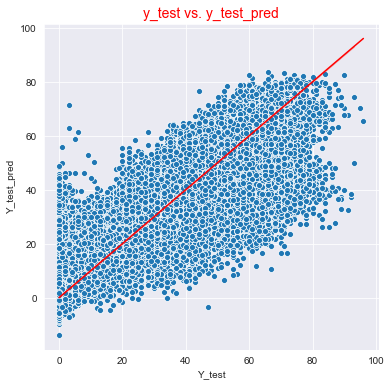

In [26]:
fig, ax = plt.subplots(figsize=(6, 6))
ax = sns.scatterplot(x=y_test, y=y_test_preds)
sns.lineplot(x=y_test, y=y_test, color='red', ax=ax)
ax.set_xlabel('Y_test')
ax.set_ylabel('Y_test_pred')
ax.set_title('y_test vs. y_test_pred', fontsize=14, color='red')
plt.show()

<a id='model_tensorflow'></a>

## Deep Learning approach with TensorFlow
This Tensorflow deep learning model is still work in progress and should be used and handled only as a first approach. Improvement is still needed to obtain satisfying results.

In [27]:
def tensor_flow_fit(X_train, X_valid, y_train, y_valid):
    """
    INPUT:
        - X_train - the input feature train set
        - X_valid - the input feature validation set
        - y_train - the target train values
        - y_valid - the target validation values
    
    OUTPUT:
        - dl_model - the tensorflow based deep learning model
        - history_df - the train and validation loss from training as a dataframe (loss vs. epochs)
    
    AIM:
        - build a reusable function for tensorflow deep learning
    """
    print('y_train.shape = ', y_train.shape)
    print('X_train.shape = ', X_train.shape)
    print('y_valid.shape = ', y_valid.shape)
    print('X_valid.shape = ', X_valid.shape)

    early_stopping = EarlyStopping(
        min_delta=0.01, # minimium amount of change to count as an improvement
        patience=10, # how many epochs to wait before stopping
        restore_best_weights=True)

    dl_model = keras.Sequential([
        layers.BatchNormalization(),
        layers.Dense(20, activation='relu', input_shape=[df_for_ml.shape[1]]),
        layers.Dropout(rate=0.3),
        layers.BatchNormalization(),
        layers.Dense(20, activation='relu'),
        layers.Dropout(rate=0.3),
        layers.Dense(1),
    ])

    dl_model.compile(
        optimizer="adam",
        loss="mse",
    )

    history = dl_model.fit(
        X_train.values, y_train.values,
        validation_data=(X_valid.values, y_valid.values),
        batch_size=265,
        epochs=100,
        callbacks=[early_stopping], # put your callbacks in a list
        verbose=1,  # turn off training log
    )

    history_df = pd.DataFrame(history.history)
    history_df.loc[:, ['loss', 'val_loss']].plot();
    print("Minimum validation loss: {}".format(history_df['val_loss'].min()))
    
    return dl_model, history_df


#### Dependent and independent variable set

['valence', 'acousticness', 'artists', 'danceability', 'duration_ms', 'energy', 'explicit', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'popularity', 'speechiness', 'tempo']


#### Only independent variables

['valence', 'acousticness', 'artists', 'danceability', 'duration_ms', 'energy', 'explicit', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'speechiness', 'tempo']


#### New shape of prepared DataFrame

(19720, 15)
(19720, 15)


W1217 22:03:10.362750 4419913152 deprecation.py:506] From /anaconda3/envs/base_clone/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


y_train.shape =  (11832,)
X_train.shape =  (11832, 24)
y_valid.shape =  (3944,)
X_valid.shape =  (3944, 24)
Train on 11832 samples, validate on 3944 samples
Epoch 1/100
11832/11832 [==============================] - 1s 48us/sample - loss: 3568.2570 - val_loss: 3552.3423
Epoch 2/100
11832/11832 [==============================] - 0s 13us/sample - loss: 3397.2524 - val_loss: 3416.7009
Epoch 3/100
11832/11832 [==============================] - 0s 17us/sample - loss: 3145.2463 - val_loss: 3203.3571
Epoch 4/100
11832/11832 [==============================] - 0s 10us/sample - loss: 2766.3307 - val_loss: 2913.1302
Epoch 5/100
11832/11832 [==============================] - 0s 9us/sample - loss: 2264.3251 - val_loss: 2636.2368
Epoch 6/100
11832/11832 [==============================] - 0s 10us/sample - loss: 1641.6400 - val_loss: 2524.5304
Epoch 7/100
11832/11832 [==============================] - 0s 11us/sample - loss: 1067.1140 - val_loss: 2546.4717
Epoch 8/100
11832/11832 [=====================

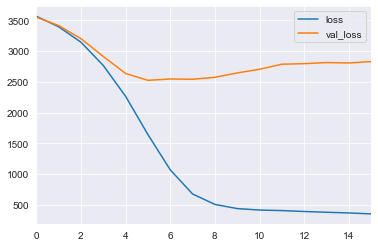

In [28]:
def clean_fit_keras_mod(df, response_col, cat_cols, dummy_na, test_size=.2, rand_state=42):
    """
    INPUT:
        - df - a dataframe holding all the variables of interest
        - response_col - a string holding the name of the column 
        - cat_cols - list of strings that are associated with names of the categorical columns
        - dummy_na - Bool holding whether you want to dummy NA vals of categorical columns or not
        - test_size - a float between [0,1] about what proportion of data should be in the test dataset
        - rand_state - an int that is provided as the random state for splitting the data into training and test 
    
    OUTPUT:
        - dl_model - model object from tensorflow
        - history_df - the train and validation loss from training as a dataframe (loss vs. epochs)
        - X_test - the input feature values for testing
        - y_test - the target values for testing
    
    AIM:
        1. Drop the rows with missing response values
        2. Drop columns with NaN for all the values
        3. Use create_dummy_df to dummy categorical columns
        4. Fill the mean of the column for any missing values 
        5. Split your data into an X matrix and a response vector y
        6. Create training and test sets of data
        7. Apply AritistsTransformer on train and test seperatly
        8. MinMax Scaler
        9. Fit your model to the training data

    """
    #Drop the rows with missing response values
    df  = df.dropna(subset=[response_col], axis=0)

    #Drop columns with all NaN values
    df = df.dropna(how='all', axis=1)

    #Dummy categorical variables
    df = create_dummy_df(df, cat_cols, dummy_na)

    # Mean function
    #fill_mean = lambda col: col.fillna(col.mean())
    # Fill the mean
    #df = df.apply(fill_mean, axis=0)

    #Split into explanatory and response variables
    X = df.drop(response_col, axis=1)
    y = df[response_col]

    
    #Split into train and test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=rand_state)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.25, random_state=42) # 0.25 x 0.8 = 0.2

    
    # Apply AritistsTransformer on train and test seperatly
    artists_transformer = ArtistsTransformer(MinCnt=2)
    X_train = artists_transformer.fit(X_train, y_train).transform(X_train, y_train)
    X_valid = artists_transformer.transform(X_test, y_valid)
    X_test = artists_transformer.transform(X_test, y_test)
    
    # MinMax Scaler
    scaler = MinMaxScaler()
    cols = X.columns.tolist()
    X_train[cols] = scaler.fit_transform(X_train[cols])
    X_valid[cols] = scaler.fit_transform(X_valid[cols])
    X_test[cols] = scaler.fit_transform(X_test[cols])
    
    
    
    dl_model, history_df = tensor_flow_fit(X_train, X_valid, y_train, y_valid)
    
    return dl_model, history_df, X_test, y_test
   
    
# prepare the dataframe for model creation. Start from the prepared numerical dataframe
df_for_ml, _ = year_range(df, [2011,2020]) 
df_for_ml, xy_columns, x_columns = get_prepared_df(df_for_ml, ['id', 'name', 'release_date', 'year'], 'popularity')

print(df_for_ml.shape)

response_col = 'popularity'
cat_cols_lst = ['key', 'mode', 'explicit']

#Start deep leaning fit
dl_model, history_df, X_test, y_test = clean_fit_keras_mod(df_for_ml, response_col, cat_cols_lst, dummy_na=False)


In [29]:
#check with test data
y_predict = dl_model.predict(X_test)
print('The MSE for the test data set is: ', mean_squared_error(y_test, y_predict))

The MSE for the test data set is:  2491.687447122365


### Result:
- This is just a first approach and still work in progress
- Next steps to be done: e.g. Hyperparameter tuning

<a id='model_random_for'></a>

## Random Forest model
This Random Forest model is still work in progress and should be used and handled only as a first approach. Improvement is still needed to obtain satisfying results.

In [30]:
def clean_fit_rndForest_mod(df, response_col, cat_cols, dummy_na, test_size=.2, rand_state=42):
     """
    INPUT:
        - df - a dataframe holding all the variables of interest
        - response_col - a string holding the name of the column 
        - cat_cols - list of strings that are associated with names of the categorical columns
        - dummy_na - Bool holding whether you want to dummy NA vals of categorical columns or not
        - test_size - a float between [0,1] about what proportion of data should be in the test dataset
        - rand_state - an int that is provided as the random state for splitting the data into training and test 
    
    OUTPUT:
        - forest_model - model object from random forest
        - X_test - the input feature values for testing
        - y_test - the target values for testing
    
    AIM:
        1. Drop the rows with missing response values
        2. Drop columns with NaN for all the values
        3. Use create_dummy_df to dummy categorical columns
        4. Fill the mean of the column for any missing values 
        5. Split your data into an X matrix and a response vector y
        6. Create training and test sets of data
        7. Apply AritistsTransformer on train and test seperatly
        8. MinMax Scaler
        9. Fit your model to the training data
        10. Make predictions on validation data

    """
    #Drop the rows with missing response values
    df  = df.dropna(subset=[response_col], axis=0)

    #Drop columns with all NaN values
    df = df.dropna(how='all', axis=1)

    #Dummy categorical variables
    df = create_dummy_df(df, cat_cols, dummy_na)

    # Mean function
    #fill_mean = lambda col: col.fillna(col.mean())
    # Fill the mean
    #df = df.apply(fill_mean, axis=0)

    #Split into explanatory and response variables
    X = df.drop(response_col, axis=1)
    y = df[response_col]

    
    #Split into train and test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=rand_state)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.25, random_state=42) # 0.25 x 0.8 = 0.2

    
    # Apply AritistsTransformer on train and test seperatly
    artists_transformer = ArtistsTransformer(MinCnt=2)
    X_train = artists_transformer.fit(X_train, y_train).transform(X_train, y_train)
    X_valid = artists_transformer.transform(X_test, y_valid)
    X_test = artists_transformer.transform(X_test, y_test)
    
    # MinMax Scaler
    scaler = MinMaxScaler()
    cols = X.columns.tolist()
    X_train[cols] = scaler.fit_transform(X_train[cols])
    X_valid[cols] = scaler.fit_transform(X_valid[cols])
    X_test[cols] = scaler.fit_transform(X_test[cols])
    
    forest_model = RandomForestRegressor(random_state=42)
    forest_model.fit(X_train, y_train)
    y_forest_predict = forest_model.predict(X_valid)
    print('The MSE for the validation data set is: ', mean_squared_error(y_valid, y_forest_predict))
    
    return forest_model, X_test, y_test
   
    
# prepare the dataframe for model creation. Start from the prepared numerical dataframe
df_for_ml, _ = year_range(df, [2011,2020]) 
df_for_ml, xy_columns, x_columns = get_prepared_df(df_for_ml, ['id', 'name', 'release_date', 'year'], 'popularity')

print(df_for_ml.shape)

response_col = 'popularity'
cat_cols_lst = ['key', 'mode', 'explicit']

#Start deep leaning fit
forest_model, X_test, y_test = clean_fit_rndForest_mod(df_for_ml, response_col, cat_cols_lst, dummy_na=False)




#### Dependent and independent variable set

['valence', 'acousticness', 'artists', 'danceability', 'duration_ms', 'energy', 'explicit', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'popularity', 'speechiness', 'tempo']


#### Only independent variables

['valence', 'acousticness', 'artists', 'danceability', 'duration_ms', 'energy', 'explicit', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'speechiness', 'tempo']


#### New shape of prepared DataFrame

(19720, 15)
(19720, 15)
The MSE for the validation data set is:  3220.9660655059724


In [31]:
#check with test data
y_predict = forest_model.predict(X_test)
print('The MSE for the test data set is: ', mean_squared_error(y_test, y_predict))

The MSE for the test data set is:  3195.091440759522


### Result:
- This is just a first approach and still work in progress
- Next steps to be done: e.g. Hyperparameter tuning

<a id='Evaluate_the_Results'></a>

# Section 5: Evaluate the Results

<a id='q1'></a>

## Question 1: In order to write a popular song, is the key and mode important?
Does popularity depend on the categorical values of key and/or mode?

### Distributions of key and mode

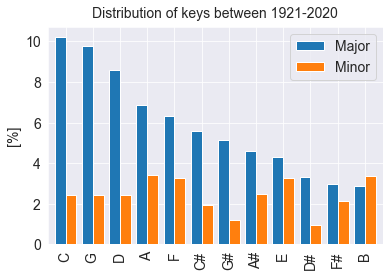

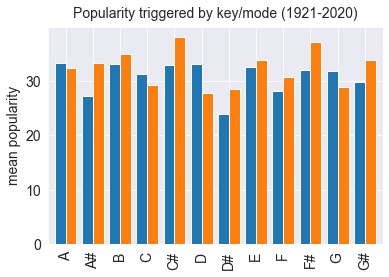

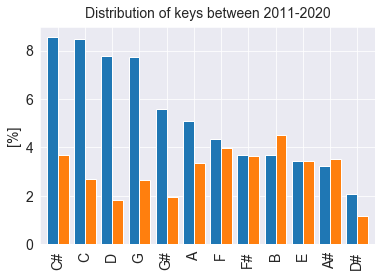

In [32]:
# Dictionary of musical notes for backward Key Note Translation
key_dictionary = {0: 'C', 1:'C#', 2:'D', 3:'D#', 4:'E', 5:'F', 6:'F#', 7:'G', 8:'G#', 9:'A', 10:'A#', 11:'B'}
key_list = ['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B'] 
mode_dictionary = {0: 'Minor', 1:'Major'}

data_cleaned['key_note'] = data_cleaned['key'].map(key_dictionary) # Create a 'key_note' column
data_cleaned['mode_trans'] = data_cleaned['mode'].map(mode_dictionary) # Create a 'mode_trans' column

# Distribution of key notes 1921-2020
df_key_mode_vals_all = pd.DataFrame(index=key_list)
df_key_mode_vals_all['Major'] = data_cleaned[data_cleaned['mode_trans']=='Major']['key_note'].value_counts() #Provide a pandas series of the counts for each key note in Major
df_key_mode_vals_all['Minor'] = data_cleaned[data_cleaned['mode_trans']=='Minor']['key_note'].value_counts() #Provide a pandas series of the counts for each key note in Minor
#display(df_key_mode)
plot_bar(df_key_mode_vals_all.sort_values(by='Major', ascending=False)/df.shape[0]*100, legend_state=True, title ='Distribution of keys between 1921-2020', y_label = '[%]', width=0.8)
        

# Does the key note influence song popularity?
df_key_mode_pop_all = pd.DataFrame()
df_key_mode_pop_all['Major'] = data_cleaned[data_cleaned['mode_trans']=='Major'].groupby(['key_note']).mean()['popularity']
df_key_mode_pop_all['Minor'] = data_cleaned[data_cleaned['mode_trans']=='Minor'].groupby(['key_note']).mean()['popularity']
#display(df_keyMode_popularity)
plot_bar(df_key_mode_pop_all, title ='Popularity triggered by key/mode (1921-2020)', y_label = 'mean popularity', width=0.8)

# Distribution of key notes 2011-2020
df_key_mode_vals_2011_2020 = pd.DataFrame()
df_decade = data_cleaned[(data_cleaned['year'] >= 2011) & (data_cleaned['year'] <= 2020)]
df_key_mode_vals_2011_2020['2011-2020_maj'] = df_decade[df_decade['mode_trans']=='Major']['key_note'].value_counts()/df_decade.shape[0]*100 #Provide a pandas series of the counts for each key note
df_key_mode_vals_2011_2020['2011_2020_min'] = df_decade[df_decade['mode_trans']=='Minor']['key_note'].value_counts()/df_decade.shape[0]*100 #Provide a pandas series of the counts for each key note
df_to_plot = df_key_mode_vals_2011_2020.loc[:,['2011-2020_maj', '2011_2020_min']].sort_values(by='2011-2020_maj', ascending=False)
plot_bar(df_to_plot, title ='Distribution of keys between 2011-2020', y_label = '[%]', width=0.8)

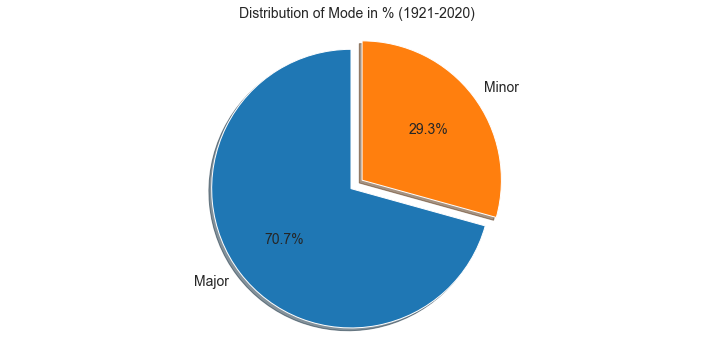

In [33]:
# distribution of mode 
mode_vals = data_cleaned['mode_trans'].value_counts() #Provide a pandas series of the counts for each key note
#display(mode_vals)
plot_pie(data_cleaned['mode_trans'].value_counts(), title ='Distribution of Mode in % (1921-2020)', explode=[0.1, 0],legend_state=False)
plt.tight_layout()

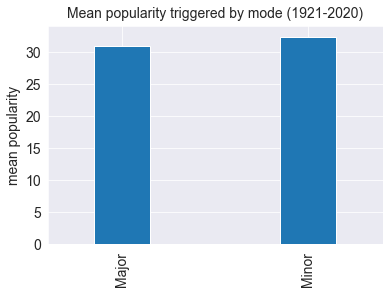

In [34]:
# Does the mode influence song popularity?
mode_popularity = data_cleaned.groupby(['mode_trans']).mean()['popularity']
#display(mode_popularity)
plot_bar(mode_popularity, title ='Mean popularity triggered by mode (1921-2020)', y_label = 'mean popularity',)

plot_bar(mode_popularity, title ='Mean popularity triggered by mode (1921-2020)', y_label = 'mean popularity',)

In [35]:
data_cleaned[(data_cleaned['key_note'] == 'C#') & (data_cleaned['mode_trans'] == 'Minor')].sort_values(by='popularity', ascending=False)

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,key_note,mode_trans
19613,0.4710,2020,0.256000,"['Internet Money', 'Gunna', 'Don Toliver', 'NAV']",0.799,195429,0.6600,1,0.000000,1,0.1110,-6.153,0,94,0.0790,140.040,C#,Minor
19633,0.1320,2020,0.131000,['Shawn Mendes'],0.333,172693,0.6370,0,0.000018,1,0.1490,-4.904,0,92,0.0581,139.898,C#,Minor
38435,0.8380,2020,0.212000,['KAROL G'],0.863,178947,0.6660,1,0.000493,1,0.1030,-4.158,0,91,0.1520,163.908,C#,Minor
19639,0.4620,2020,0.250000,"['Internet Money', 'Gunna', 'Don Toliver', 'NAV']",0.800,195429,0.6580,1,0.000000,1,0.1110,-6.142,0,90,0.0790,140.042,C#,Minor
19777,0.4570,2020,0.007860,['Ava Max'],0.637,162399,0.6900,0,0.000000,1,0.1240,-4.057,0,87,0.0405,129.857,C#,Minor
19629,0.1160,2020,0.345000,['Polo G'],0.832,132833,0.5340,1,0.000000,1,0.1650,-7.813,0,87,0.2530,93.924,C#,Minor
19442,0.3270,2019,0.592000,['Ariana Grande'],0.778,178627,0.3170,1,0.000000,1,0.0881,-10.732,0,87,0.3340,140.048,C#,Minor
38470,0.1990,2020,0.002570,"['K/DA', 'Madison Beer', '(G)I-DLE', 'Lexie Li...",0.660,217088,0.7870,0,0.000000,1,0.3230,-4.592,0,85,0.0320,142.018,C#,Minor
19074,0.9310,2017,0.581000,['Ed Sheeran'],0.825,233713,0.6520,0,0.000000,1,0.0931,-3.183,0,85,0.0802,95.977,C#,Minor
19230,0.0895,2018,0.720000,"['Kina', 'Snøw']",0.498,179080,0.2350,0,0.000000,1,0.1440,-16.541,0,85,0.1880,118.917,C#,Minor


In [36]:
# Which are the most popular C# Minor songs for each year between 2011-2020?
# Keep only two examples (2017 and 2019)
data_top_cSharp_min_songs = df.copy()
data_top_cSharp_min_songs['key_note'] = df['key'].map(key_dictionary) # Create a 'key_note' column
data_top_cSharp_min_songs['mode_trans'] = df['mode'].map(mode_dictionary) # Create a 'mode_trans' column
data_top_cSharp_min_songs['key'] = data_top_cSharp_min_songs['key_note']
data_top_cSharp_min_songs['mode'] = data_top_cSharp_min_songs['mode_trans']
best_off_cSharp_minor = data_top_cSharp_min_songs.iloc[data_top_cSharp_min_songs[(data_top_cSharp_min_songs['key_note'] =='C#') & (data_top_cSharp_min_songs['mode_trans'] =='Minor')].groupby("year")["popularity"].idxmax()]
best_off_cSharp_minor = best_off_cSharp_minor[(best_off_cSharp_minor['year'] == 2017) |  (best_off_cSharp_minor['year'] == 2019)]

best_off_cSharp_minor.loc[:,'artist'] = best_off_cSharp_minor['artists'].map(lambda x: x.replace('[', '').replace(']', '').replace('\'', ''))

best_off_cSharp_minor = best_off_cSharp_minor[['name', 'artist', 'popularity', 'year', 'key', 'mode']]
printmd('***Most popular C# minor songs:***')

display(best_off_cSharp_minor)


***Most popular C# minor songs:***

,name,artist,popularity,year,key,mode
19074,Shape of You,Ed Sheeran,85,2017,C#,Minor
19442,7 rings,Ariana Grande,87,2019,C#,Minor


### RESULTS - Key and Mode between 1921-2020:
- More than 20% of all songs between 1921 and 2020 are written in the keys C Major or G Major.
- More than 70% percent of the songs are written in Major mode
- There is no clear trend that the key note would trigger the popularity of a song.
- There is also no significant trend that the mode would trigger the popularity of a song

***Takeaway message:*** 
The key and the mode of a song does not significantly influence the popularity of a song.



### The C# HipHop phenomenon in the decade 2011-2020
Why are there so many songs in C# Major in the period 2011-2020 (especially between 2017 and 2020)?
- There is a significant shift from C to C# in the frequency distribution. This fact could be related to several circumstances:
    - Wrong classification. Via own sample investigation there are a lot of C# Major songs in the database which are misclassified. The database label for C# is 1. It seems that in a lot of cases, which were difficult to analyze, the label 1 was used.  
    - In addition, accordingly to a post (https://vi-control.net/community/threads/why-flat-sharp-keys-are-so-usual-into-hip-hop.29561/) there seems to be an actual trend in HipHop to use flat keys: C# Major seems to be a favorite key. By an analysis over 500,000 Echo Nest tracks the following relations were reported. If flat keys are used than 20.0% are written in Db (C#).
    - However: For HipHop based tracks the mode of the song is in some cases not clear. So some kind of misclassification is going on. Some proportion of C#  Minor songs are also misinterpreted as C# Major songs.
    - Guitarists like to use a capodaster in the first fret. C Major Songs are transposed to C# Major songs in that way. A famous example is the song Lemon Tree from Fools Garden.

In [37]:
df_hiphop = df.copy()
df_hiphop['key_note'] = df_hiphop['key'].map(key_dictionary) # Create a 'key_note' column
df_hiphop['mode_trans'] = df_hiphop['mode'].map(mode_dictionary) # Create a 'mode_trans' column

name_list = ['Lemon Tree', 'WAP (feat. Megan Thee Stallion)', 'If the World Was Ending - feat. Julia Michaels', 'We Paid (feat. 42 Dugg)']
printmd('### Some actual and/or popular C# major songs')
df_hiphop[(df_hiphop['key_note'] == 'C#') & (df_hiphop['mode_trans'] == 'Major') & (df_hiphop['name'].isin(name_list))][['name', 'artists', 'popularity', 'year','key_note', 'mode_trans']].sort_values(by='popularity',ascending=False)

### Some actual and/or popular C# major songs

,name,artists,popularity,year,key_note,mode_trans
19608,WAP (feat. Megan Thee Stallion),"['Cardi B', 'Megan Thee Stallion']",96,2020,C#,Major
19414,If the World Was Ending - feat. Julia Michaels,"['JP Saxe', 'Julia Michaels']",87,2019,C#,Major
19664,We Paid (feat. 42 Dugg),"['Lil Baby', '42 Dugg']",82,2020,C#,Major
14702,Lemon Tree,['Fools Garden'],78,1995,C#,Major


<a id='q2'></a>

## Question 2: 1955-1960: The popularity level climbs up - Who are the most famous artists at this time?


Why is 'year' so important for popularity?
- A low noise trend can be observed for the popularity-dependence on year.
- It is obvious that popularity increases with years. There is a strong linear dependency between both starting from the mid/late 1950s.
- Even more: There is an abrupt increase of popularity around the mid/end of the fifties of the last century.
- Unfortunately, a column like ‚amount of advertisement‘ or ‘number of times played in radio’ does not exist in the dataset. So, this fact gives some room for speculation. But it is obvious, that it could be related to the development of radio, television, cinema, music magazines and later by a growing music fan base triggered by growing media platforms with the years.

(-10, 80)

<Figure size 216x216 with 0 Axes>

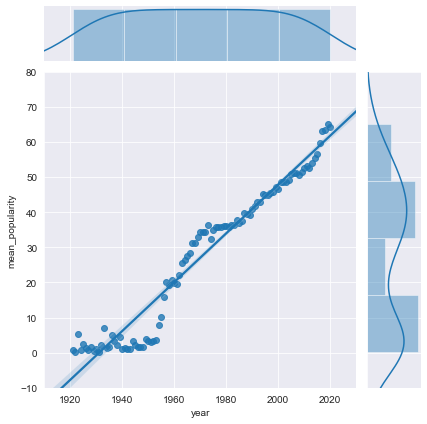

In [38]:
# Create scatter plot with density plots for the axis
plt.figure(figsize=(3,3))
mean_df = df.groupby(['year'])['popularity'].mean().to_frame().reset_index()
mean_df['mean_popularity'] = mean_df['popularity']
mean_df_55_60 = mean_df[(mean_df['year']>1954) & (mean_df['year']<1960)]
#sns.scatterplot(x=mean_df[xvar], y=mean_df.popularity)

plot = sns.jointplot(x='year', y='mean_popularity', data=mean_df, kind='reg')
plot.ax_marg_x.set_xlim(1910, 2030)
plot.ax_marg_y.set_ylim(-10, 80)

***1950-1960 most popular songs:***

,name,artist,popularity,year
7406,Let It Snow! Let It Snow! Let It Snow!,Dean Martin,81,1959
7409,Johnny B. Goode,Chuck Berry,75,1959
7006,Blue Christmas,Elvis Presley,74,1957
7207,Jailhouse Rock,Elvis Presley,73,1958
7007,Dream A Little Dream Of Me - Single Version,"Ella Fitzgerald, Louis Armstrong",72,1957
7206,Come Fly With Me - Remastered,Frank Sinatra,70,1958
7411,Rudolph The Red-Nosed Reindeer,Dean Martin,70,1959
7216,My Baby Just Cares for Me - 2013 Remastered Ve...,Nina Simone,69,1958
7209,Hound Dog,Elvis Presley,69,1958
7407,Big Iron,Marty Robbins,69,1959


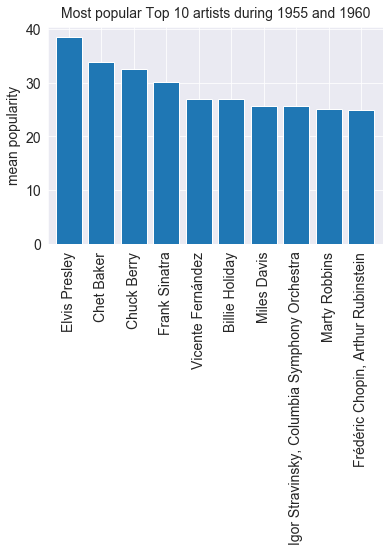

In [39]:
# Find the most popular top 10 artists between 1950 and 1960
# As a second order popularity condition, artists must have more than 100 songs on Spotify
data_late50s_topArtists = df[(df['year'] > 1955) & (df['year'] < 1960)].sort_values(by='popularity', ascending=False)
printmd('***1950-1960 most popular songs:***')
data_late50s_topArtists.loc[:,'artist'] = data_late50s_topArtists['artists'].map(lambda x: x.replace('[', '').replace(']', '').replace('\'', ''))

display(data_late50s_topArtists[['name', 'artist', 'popularity', 'year']].head(10))

data_late50s_topArtists['top_artist'] = data_late50s_topArtists['artists'].map(df['artists'].value_counts()>100)
pop_arts  = data_late50s_topArtists.groupby(['artist', 'top_artist'])['popularity'].mean().sort_values(ascending=False).reset_index(1)
data_to_plot = pop_arts.loc[pop_arts['top_artist'] == True,['popularity']].head(10)
plot_bar(data_to_plot, title ='Most popular Top 10 artists during 1955 and 1960', y_label = 'mean popularity', width=0.8)


<a id='tempo'></a>

### Results:
Who were the winners at this time? Of course, this no surprise for music experts. The top winners were: Elvis Presley, Chet Baker, Chuck Berry and Frank Sinatra. The top ten artists at this 'winning period' are listed in descending order in the upper bar plot. Would they have become famous even without the invention of radio and television? Maybe nobody would know them today, although they were all fantastic musicians.

<a id='q3'></a>

## Question 3: Which actual top artists write/have the most popular songs?


***Most popular songs:***

,name,artist,popularity,year
19611,Dakiti,"Bad Bunny, Jhay Cortez",100,2020
19606,Mood (feat. iann dior),"24kGoldn, iann dior",99,2020
19618,Dynamite,BTS,97,2020
19608,WAP (feat. Megan Thee Stallion),"Cardi B, Megan Thee Stallion",96,2020
19610,positions,Ariana Grande,96,2020
19612,What You Know Bout Love,Pop Smoke,96,2020
19616,Blinding Lights,The Weeknd,96,2020
19607,For The Night (feat. Lil Baby & DaBaby),"Pop Smoke, Lil Baby, DaBaby",95,2020
19615,Holy (feat. Chance The Rapper),"Justin Bieber, Chance the Rapper",95,2020
19620,Lonely (with benny blanco),"Justin Bieber, benny blanco",95,2020


*artists with more than 200 songs on Spotify

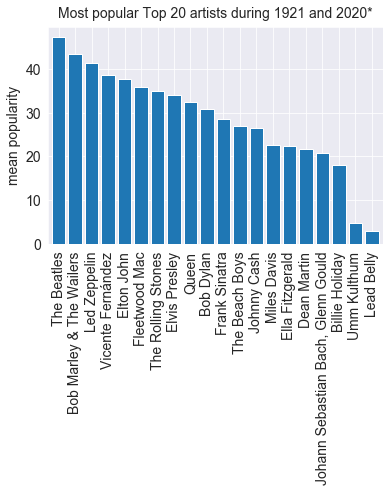

In [40]:
# Who are the top 10 artists between 1921-2020?
# As a second order popularity condition, artists must have more than 250 songs on Spotify
data_topArtists = df.sort_values(by='popularity', ascending=False)
printmd('***Most popular songs:***')
data_topArtists.loc[:,'artist'] = data_topArtists['artists'].map(lambda x: x.replace('[', '').replace(']', '').replace('\'', ''))

display(data_topArtists[['name', 'artist', 'popularity', 'year']].head(10))

data_topArtists['top_artist'] = data_topArtists['artists'].map(data_topArtists['artists'].value_counts()>250)
top_art  = data_topArtists.groupby(['artist', 'top_artist'])['popularity'].mean().sort_values(ascending=False).reset_index(1)
data_to_plot = top_art.loc[top_art['top_artist'] == True,['popularity']].head(20)
plot_bar(data_to_plot, title ='Most popular Top 20 artists during 1921 and 2020*', y_label = 'mean popularity', width=0.8)

printmd('*artists with more than 200 songs on Spotify')

***Most popular songs:***

,name,artist,popularity,year
19407,Watermelon Sugar,Harry Styles,94,2019
19426,Breaking Me,"Topic, A7S",92,2019
19413,Someone You Loved,Lewis Capaldi,91,2019
19406,Sofia,Clairo,90,2019
19443,Memories,Maroon 5,89,2019
19207,Lucid Dreams,Juice WRLD,89,2018
19210,lovely (with Khalid),"Billie Eilish, Khalid",89,2018
19441,Dance Monkey,Tones And I,89,2019
19417,Golden,Harry Styles,89,2019
19409,Circles,Post Malone,89,2019


*artists with more than 50 songs on Spotify

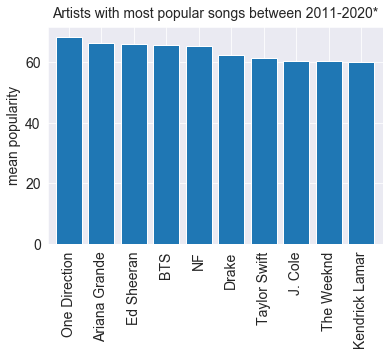

In [41]:
# Who are the top 10 artists between 1921-2020?
# As a second order popularity condition, artists must have more than 50 songs on Spotify
data_topArtists_actual = df[(df['year']>2010) & (df['year']<2020)].sort_values(by='popularity', ascending=False)
printmd('***Most popular songs:***')
data_topArtists_actual.loc[:,'artist'] = data_topArtists_actual['artists'].map(lambda x: x.replace('[', '').replace(']', '').replace('\'', ''))

display(data_topArtists_actual[['name', 'artist', 'popularity', 'year']].head(10))

data_topArtists_actual['top_artist'] = data_topArtists_actual['artists'].map(data_topArtists_actual['artists'].value_counts()>50)
top_art  = data_topArtists_actual.groupby(['artist', 'top_artist'])['popularity'].mean().sort_values(ascending=False).reset_index(1)
data_to_plot = top_art.loc[top_art['top_artist'] == True,['popularity']].head(10)
plot_bar(data_to_plot, title ='Artists with most popular songs between 2011-2020*', y_label = 'mean popularity', width=0.8)

printmd('*artists with more than 50 songs on Spotify')

<a id='q4'></a>

## Question 4: How do you become a famous song writer?

,weights
variables,
speechiness,-11.887137
acousticness,-9.067794
valence,-8.671936
liveness,-4.600422
instrumentalness,-2.922570
mode_1,-0.425738
key_3,-0.387459
key_2,-0.261757
key_9,-0.107670


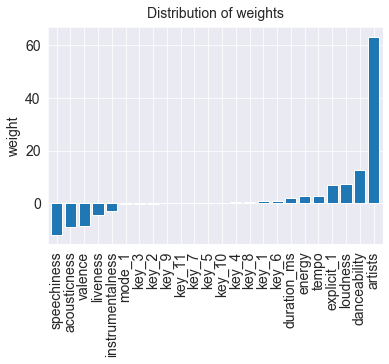

In [42]:
# Get the weights from lm_model
df_weight = pd.DataFrame({'variables' :X_train.columns, 'weights' :lm_model.coef_}).sort_values(by='weights').set_index('variables')

display(df_weight)
plot_bar(df_weight, title ='Distribution of weights', y_label = 'weight', width=0.8)

,weights
variables,
speechiness,-11.887137
acousticness,-9.067794
valence,-8.671936
liveness,-4.600422
instrumentalness,-2.922570
mode,-0.425738
key,0.226820
duration_ms,1.986342
energy,2.575496


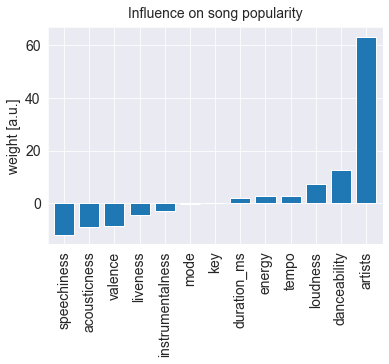

In [43]:
# summarize the weights for keys and do renaming
key_mean = float(df_weight.iloc[6:17].mean())
df_weight_new = df_weight.reset_index()

df_final = df_weight_new[(df_weight_new['variables'].str.contains('key_')==False) & (df_weight_new['variables'].str.contains('mode_')==False) & (df_weight_new['variables'].str.contains('explicit_')==False)]

df_final.loc[len(df_final)] = ['key', key_mean]
df_final.loc[len(df_final)] = ['mode', float(df_weight.loc['mode_1'])]
df_final.set_index('variables', inplace=True)
df_final = df_final.sort_values(by='weights')
display(df_final)

plot_bar(df_final, title ='Influence on song popularity', y_label = 'weight [a.u.]', width=0.8)

### Results: 
If you want to write popular songs. i.e. to become a famous song writer:
- The main driver of becoming a song writer for popular songs is to write for an already popular musician. It is easier to produce a popular song if the artist is already famous.
- Besides 'artists', the positive right side of the bar plot can be summarized in the following way: Produce/write energetic, loud and danceable songs!
- The left (negative side) of the bar plot in short form: Real studio productions are better than productions with live character. Do not write purely instrumental songs and do not intensify a strong acoustic environment within your song!

<a id='q5'></a>

## Question 5: What are those songs with high popularity but zero tempo, danceability and speechiness?
There are some songs with 0bpm but with a real popularity. This subset is identical to subsets with 0 danceability and 0 spechiness. Are those songs real songs?

<a id='0_dance'></a>

In [44]:
# Find some examples (most popular ones) of zero tempo songs
data_zero_tempo = df[df['tempo'] ==0].sort_values(by='popularity', ascending=False)
printmd('***# of songs with 0 bpm:*** ' + str(data_zero_tempo.shape[0]))
printmd('***Examples for 0 bpm songs:***')
display(data_zero_tempo[['name', 'artists', 'year', 'tempo', 'speechiness', 'danceability', 'popularity']].head(10))

***# of songs with 0 bpm:*** 143

***Examples for 0 bpm songs:***

,name,artists,year,tempo,speechiness,danceability,popularity
19030,Clean White Noise - Loopable with no fade,"['Erik Eriksson', 'White Noise Baby Sleep', 'W...",2017,0.0,0.0,0.0,85
19260,Soft Brown Noise,['High Altitude Samples'],2018,0.0,0.0,0.0,81
19038,White Noise - 500 hz,['Granular'],2017,0.0,0.0,0.0,79
19029,White Noise - 145 hz,['Granular'],2017,0.0,0.0,0.0,78
38356,White Noise Crashing Waves,['Bruce Brus'],2019,0.0,0.0,0.0,76
38133,Clean & Pure White Noise,['Zenibly'],2018,0.0,0.0,0.0,74
75221,Deep Sleep Recovery Noise,['Water Sound Natural White Noise'],2020,0.0,0.0,0.0,74
38348,Tepid Rainscape,['Fizzonaut'],2019,0.0,0.0,0.0,73
18641,Brown Noise - Loopable with No Fade,"['White Noise Meditation', 'Lullaby Land', 'Wh...",2015,0.0,0.0,0.0,72
56682,Pure Brown Noise - Loopable with no fade,"['Erik Eriksson', 'White Noise for Babies', 'W...",2017,0.0,0.0,0.0,72


### Result: 
In fact, as one can see from the above eavluation those 'songs' with zero bpm (zero danceability, zero speechiness) are not real songs but noises or sounds. It seems that those 'sounds' are popular because they seem to have a positive effect on a restful sleep or for relaxation.  As the goal is to give an answer to a song writer 'How to write popular ***real*** songs', those data has been removed from the dataset.    